# Gaming market analysis

## Project description

We work in e-shop which sells video games worldwide

We have the date about retro sales of games, users and critics ratings, game genres and platforms (Xbox, PS)

**The goal** is to identify success factors and to figure out the strategy for the upcoming year (selling products, ads campaigns and etc)

## Data description

* `Name` — name of a game
* `Platform` — platform
* `Year_of_Release` — release year
* `Genre` — game genre
* `NA_sales` — sales in North America (million copies sold)
* `EU_sales` — sales in Europe (million copies sold)
* `JP_sales` — sales in Japan (million copies sold)
* `Other_sales` — sales in Other countries (million copies sold)
* `Critic_Score` — critic score (max 100)
* `User_Score` — user score (max 10)
* `Rating` — ESRB rating (Entertainment Software Rating Board). This association determines age ratings for video games

Data for 2016 migth be not full

<a id='read'></a>
## Open and Read

### Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# making all the graphs with better quality
%config InlineBackend.figure_format = 'retina'

### Read

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

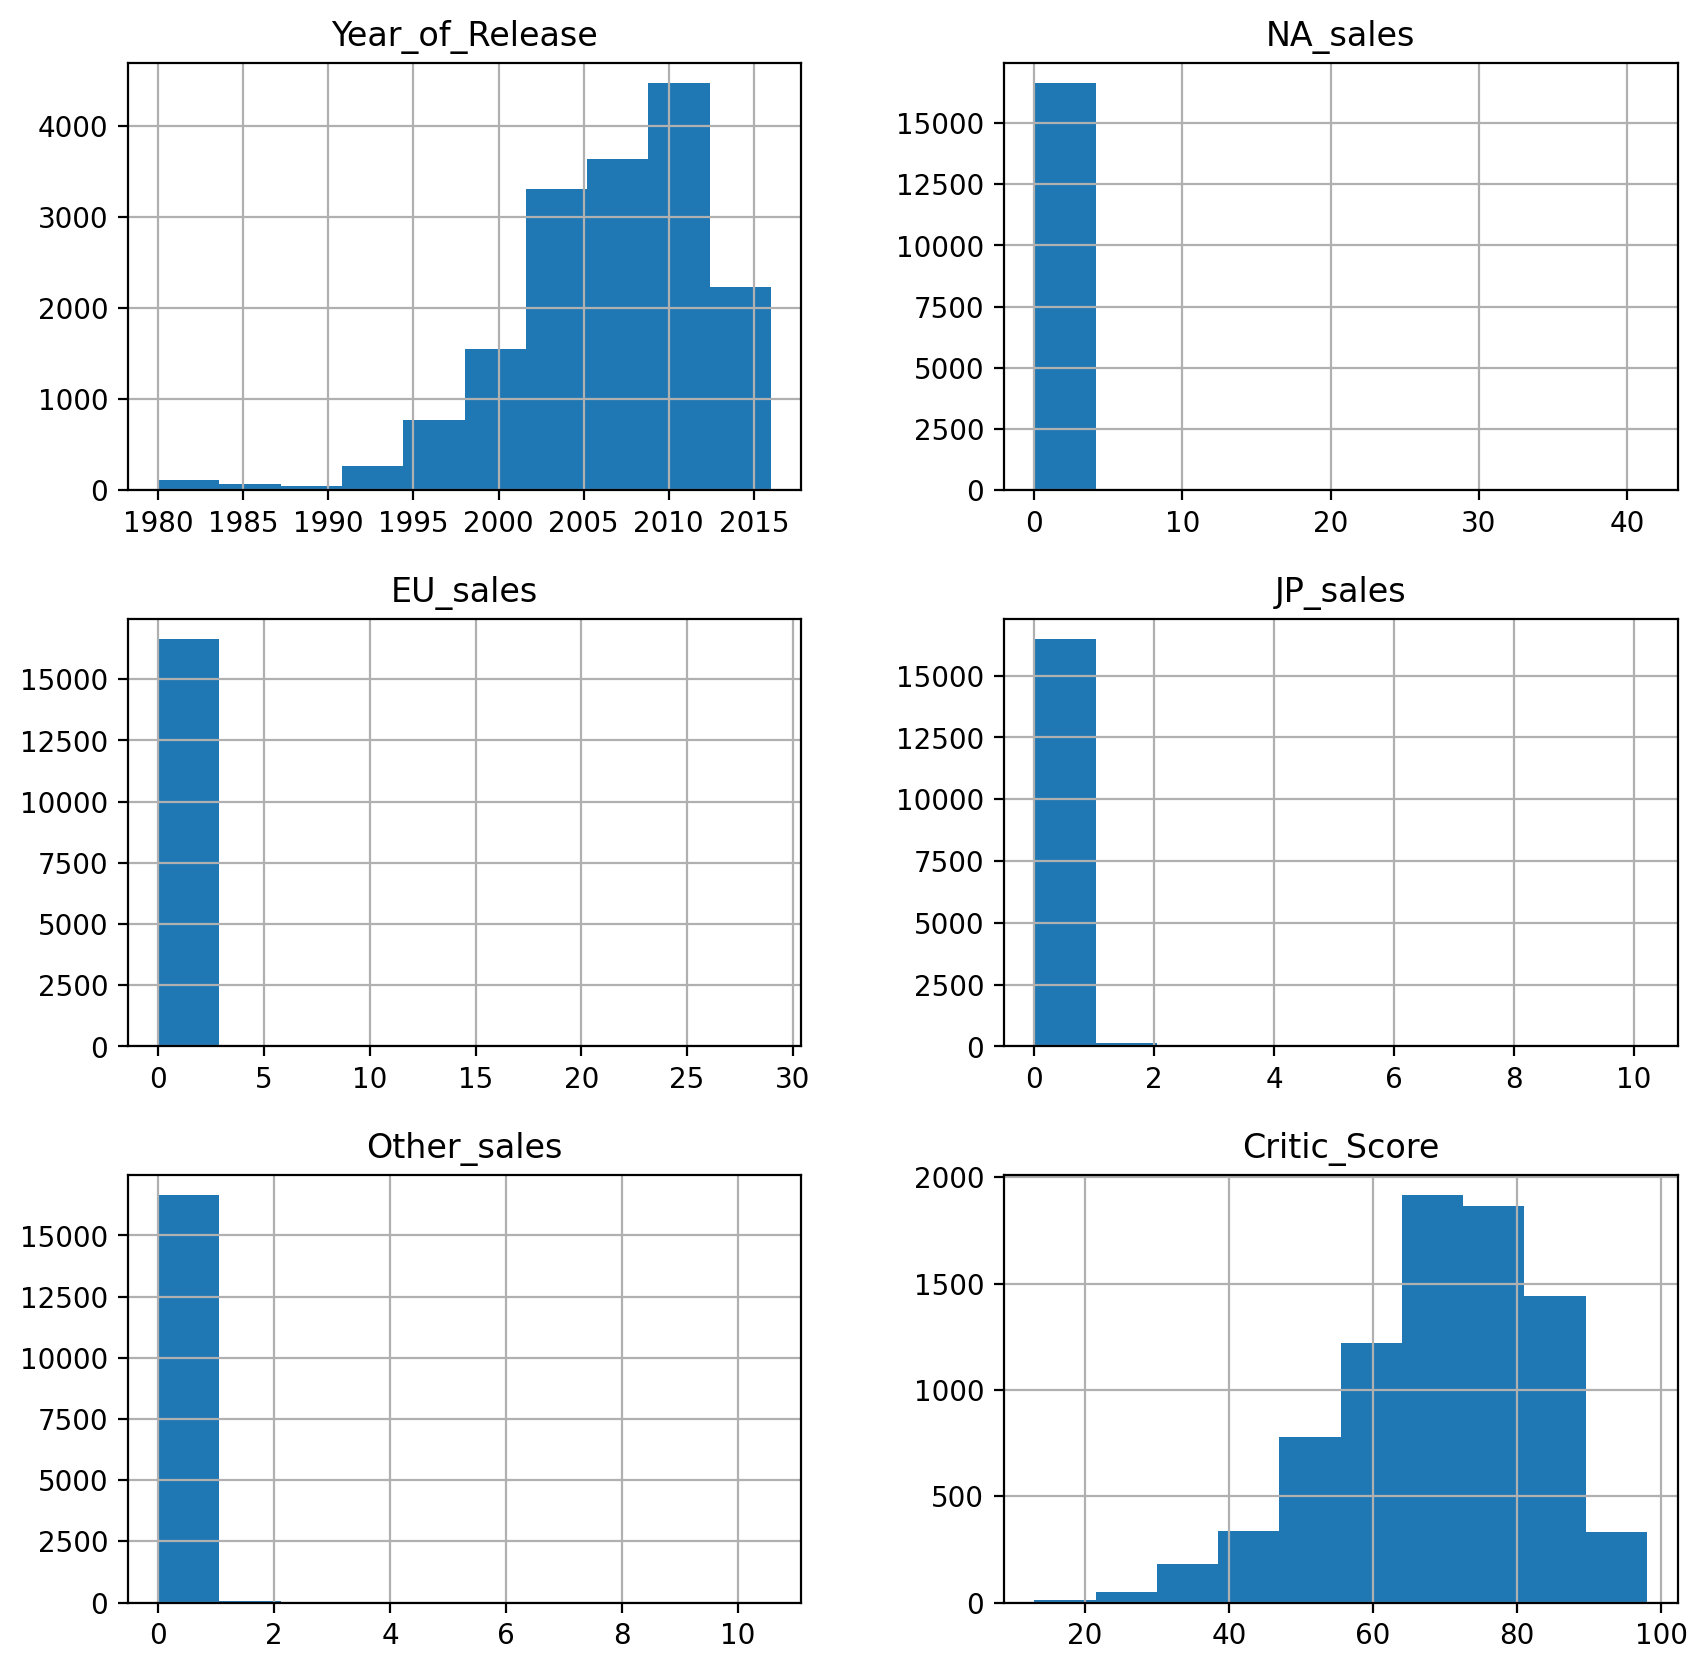

In [6]:
data.hist(figsize=(10, 10));

**Conclusion and further actions**:

1. Column names to *lower* case
2. Duplicates check
3. ~half of data has missing score (both user and critic)
4. Rest majority of data is in place (minor missing values in names, but sales and platforms are in place)
5. Change year to `int`
6. User score to `float` (separetely check `tbd` values)
7. There are some runouts seen in histograms - should check
8. Make a sum column with total sales by regions

<a id='prepare'></a>
## Data preprocessing

### Column names

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Switched to lowercase

### Duplicates

In [8]:
# full
data.duplicated().sum()

0

In [9]:
# by platforms
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [10]:
# check by genres
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [11]:
# check by ratings
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Let's also check unobvious duplicates check by: `name` + `platform` + `release year`

In [12]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

2

Let's have a look

In [13]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False) == True]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E

Okay, we can delete the last values (duplicated) as they have less data than the first lines 

In [14]:
data = data[data[['name', 'platform', 'year_of_release']].duplicated() == False]

In [15]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

0

Done with duplicates

### Missing values check

#### Names and genres

In [16]:
data[data['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659  NaN      GEN           1993.0   NaN      1.78      0.53       0.0   

     other_sales  critic_score user_score rating  
659         0.08           NaN        NaN    NaN

Only one missing value - can surely clear

In [17]:
data = data.dropna(subset=['name'])

#### Years

In [18]:
data[data['year_of_release'].isna()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

269 NaN of 16713 values. Let's delete

In [19]:
data = data.dropna(subset=['year_of_release'])

Converting to `int`

In [20]:
pd.options.mode.chained_assignment = None # to prevent error: SettingWithCopyWarning
data['year_of_release'] = data['year_of_release'].astype('int')

In [21]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

#### Ratings

Check the values in `critic_score`

In [22]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [23]:
print('Number of games:', data['critic_score'].isna().count())
print('Number of NAs:', data['critic_score'].isna().sum())

Number of games: 16443
Number of NAs: 8461


* Rating scale from 0 to 100
* NAs is almost half of all games

There is no criteria in the dataset to fill this metric correctly 

Check for the `user_score` values

In [24]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Rating scale from 0 to 10 + NAs and `tbd` values

Let's check `tbd`, then convert scale to 0-100 so that to be in line with `critic_score`

In [25]:
data[data['user_score'] == 'tbd']

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS             2008      Puzzle   
16704                        Plushees       DS             2008  Simulation   
16706   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66           NaN        tbd   
301        2.08      1.35       0.0         0.54          61.0        tbd   
520        1.51      1.03       0.0         0.27           NaN        tbd   
645        1.65      0.57       0.0         0.20          71.0        tbd   
718        1.52      0.54       0.0         0.18           NaN        tbd   
...         ...       ...       ...          ...           ...        ...   
16695      0.01      0.00       0.0         0.00          67.0        tbd   
16697      0.01      0.00       0.0         0.00          53.0        tbd   
16698      0.01      0.00       0.0         0.00          48.0        tbd   
16704      0.01      0.00       0.0         0.00           NaN        tbd   
16706      0.01      0.00       0.0         0.00           NaN        tbd   

      rating  
119        E  
301     E10+  
520        T  
645        E  
718        E  
...      ...  
16695      E  
16697      E  
16698      E  
16704      E  
16706      T  

[2376 rows x 11 columns]

`tbd` - To be determined, what means that the score will appear later

I.e. in **Metacritic** such status is set for the games with <4 user reviews

`tbd` count is 2376, that's a lot: 
* Maybe ratings are missing (despite the realse date far earlier than 2016) 
* Maybe database is old (***ACTION: to ask data collection team***)

For the further analysis we will convert `tbd` to `NaN`

In [26]:
# tbd --> None
data['user_score'] = data['user_score'].replace(to_replace='tbd', value=None)

In [27]:
# 0-100 user score scale conversion
data['user_score'] = data['user_score'].astype('float') * 10

In [28]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0        80.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0        83.0      E  
3     10.93      3.28         2.95          80.0        80.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Ratings now alike

So as the amount of user and critics ratings

**Conclusion:**
* Kicked out games with missing values and duplicates
* Release year is now `int`
* `user_score` is cleared of `tbd` to `NaN` and has a new score scale as in `critic_score`

### Total Sales column

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [31]:
data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0        80.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0        83.0      E   
3     10.93      3.28         2.95          80.0        80.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

<a id='research'></a>
## Exploratory Data Analysis

### Games released by years

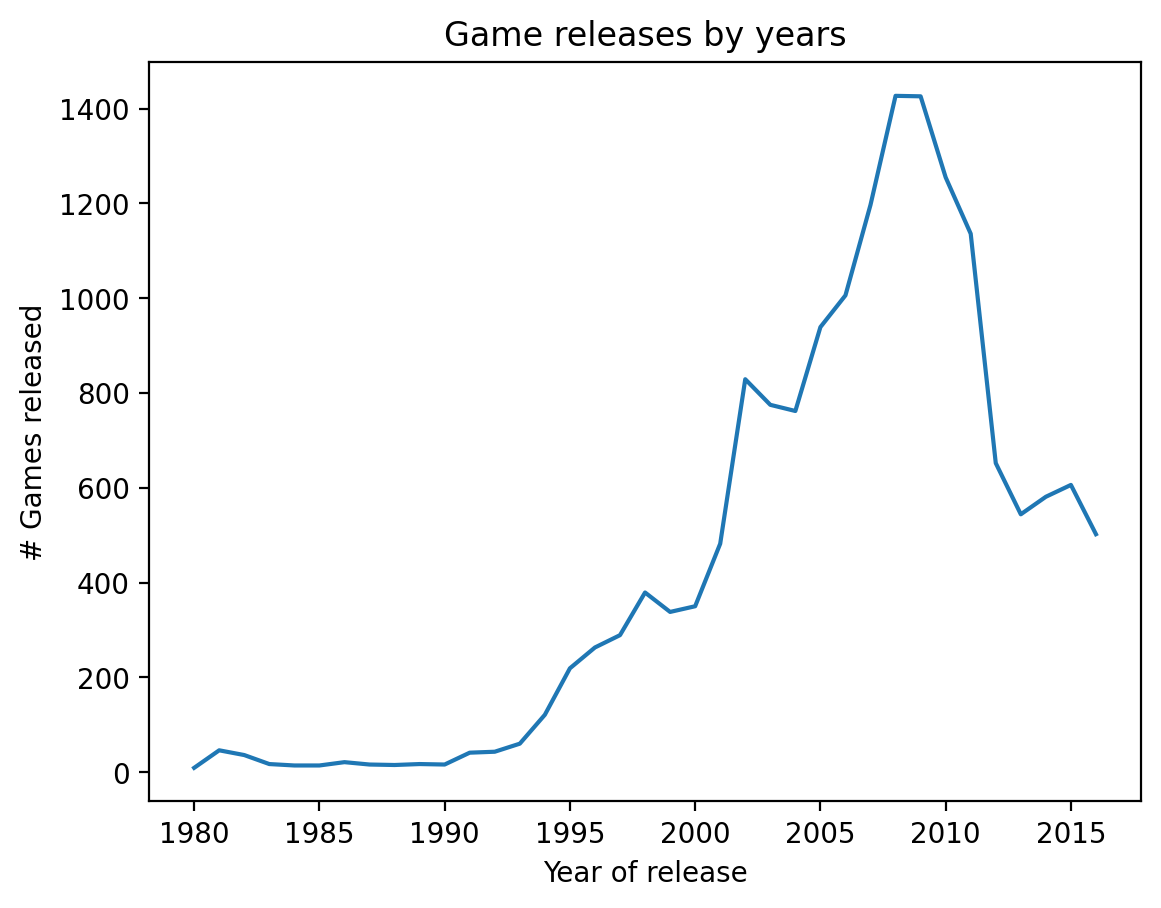

In [32]:
data.groupby('year_of_release')['name'].count().plot(title='Game releases by years');
plt.xlabel('Year of release');
plt.ylabel('# Games released');

In [33]:
data.groupby('year_of_release')['year_of_release'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

In [34]:
# games released during 1980 - 1995 by years (before first peak)
data.groupby('year_of_release')['name'].count()[:16].sum()

705

In [35]:
# games released during 1980 - 2000 by years (before second peak)
data.groupby('year_of_release')['name'].count()[:21].sum()

2324

Let's put on a graph `Total sales` in mln copies sold

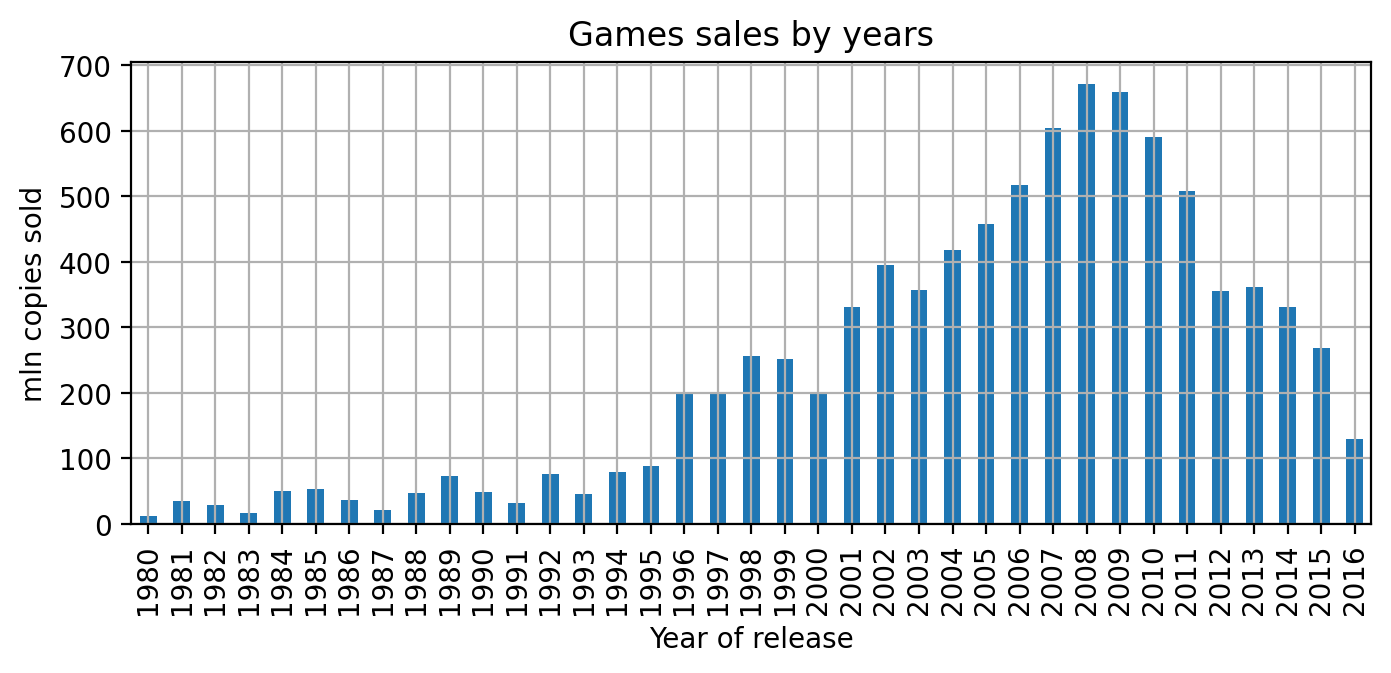

In [36]:
(data.groupby('year_of_release')['total_sales'].agg('sum')
 .plot(kind='bar', figsize=(8, 3), grid=True, title='Games sales by years'));

plt.xlabel('Year of release');
plt.ylabel('mln copies sold');

**Conclusion:**
* Game industry before 1995 developing slowly. Only 705 games released during 16 years 1980-1995
* After that games boom started and industry reached its peak by 2008-09
* But later on sales started to get down reaching its plato by 2011-15 
* **In 2016 sales decrease twice vs 2015 (but maybe due to lack of data)**

### Sales by platforms
* Look at platforms performance in general
* Check platforms with the biggest sales and look at them in dynamics 
* Check platform lifetime period

Let's look at the platforms performance in general and check games distribution by years

In [37]:
platforms = data['platform'].sort_values().unique().tolist()
print(platforms)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


Now let's clean all the games before 1995

In [38]:
# settings change to "show me all columns"
pd.set_option('display.max_columns', None)

In [39]:
# new var as "show me relevant data" before 1995
data_relevant = data[data['year_of_release'] > 1995].pivot_table(index='year_of_release', 
                                                                 columns='platform', 
                                                                 values='total_sales', 
                                                                 aggfunc='sum')

# filling NaN with '' for better table look and cleaning platforms with low sales
data_relevant.fillna('').drop(['NG', 'PCFX', 'DC', 'SAT', 'WS'], axis=1)

platform           3DS      DS     GB    GBA     GC    N64     PC      PS  \
year_of_release                                                             
1996                            36.03                 34.1  10.58    94.7   
1997                             6.37                 39.5  11.27  136.17   
1998                             26.9                49.24   3.26  169.49   
1999                             38.0                57.87   4.74  144.53   
2000                            19.76   0.07         33.97   4.66   96.37   
2001                             9.24  61.53  26.34   3.25   5.47   35.59   
2002                                   74.16  51.81   0.08   8.57    6.67   
2003                                   56.67  50.61          8.84    2.07   
2004                     17.27         77.91  28.82         10.39           
2005                    130.14         33.86  27.62          4.37           
2006                    119.81          5.28  11.26          2.85           
2007                    146.94           3.4   0.27          9.28           
2008                    145.31                              12.42           
2009                    119.54                              16.91           
2010                     85.02                              24.28           
2011              63.2   26.18                              35.03           
2012             51.36   11.01                              23.22           
2013             56.57    1.54                              12.38           
2014             43.76                                      13.28           
2015             27.78                                       8.52           
2016             15.14                                       5.25           

platform            PS2     PS3    PS4    PSP    PSV   SNES     Wii   WiiU  \
year_of_release                                                              
1996                                                  15.92                  
1997                                                   0.99                  
1998                                                   0.22                  
1999                                                   0.26                  
2000              39.17                                                      
2001             166.43                                                      
2002             205.38                                                      
2003             184.31                                                      
2004             211.81                  7.06                                
2005             160.66                 43.84                                
2006             103.42   20.96         55.32                137.15          
2007              75.99   73.19         46.93                152.77          
2008               53.9  118.52         34.55                171.32          
2009               26.4  130.93         37.78                206.97          
2010               5.64  142.17         35.04                127.95          
2011               0.45  156.78         17.82   4.63          59.65          
2012                     107.35          7.69  16.19          21.71  17.56   
2013                     113.25  25.99   3.14  10.59           8.59  21.65   
2014                      47.76  100.0   0.24   11.9           3.75  22.03   
2015                      16.82  118.9   0.12   6.25           1.14  16.35   
2016                        3.6  69.25          4.25           0.18    4.6   

platform           X360     XB   XOne  
year_of_release                        
1996                                   
1997                                   
1998                                   
1999                                   
2000                      0.99         
2001                     22.26         
2002                     48.01         
2003                     55.04         
2004                     65.42   

Still many of them left. Let's pick top-10

In [40]:
top_list = data_relevant.sum().sort_values(ascending=False).head(10).index.tolist()
top_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

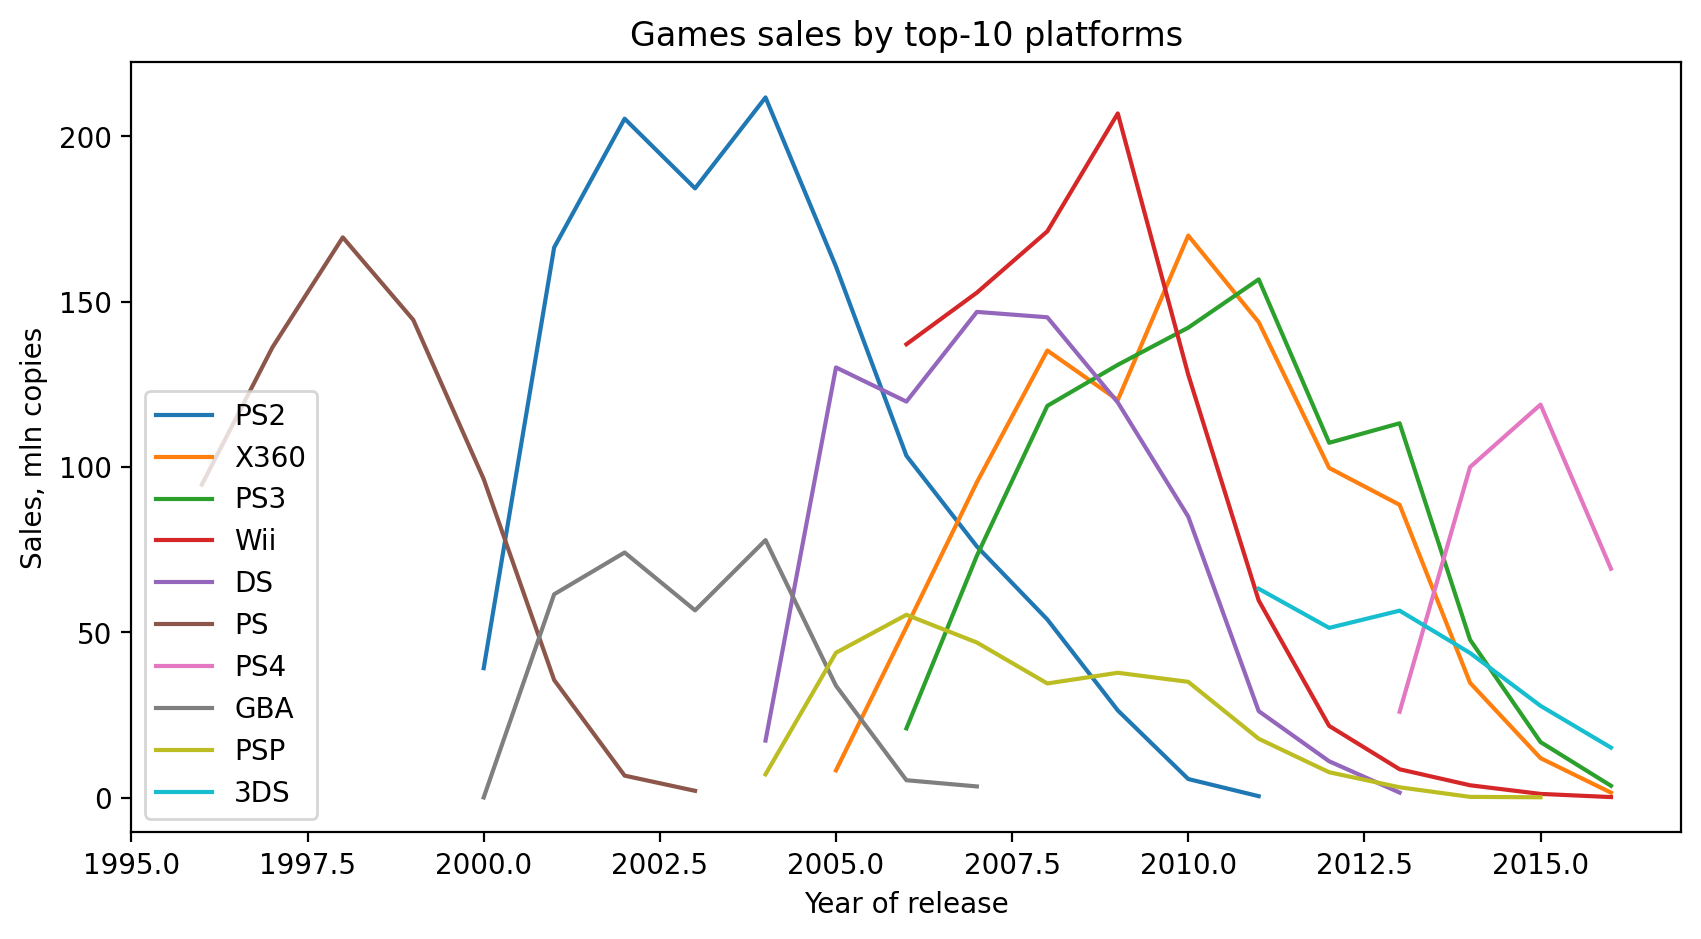

In [41]:
data_relevant[top_list].plot(figsize= (10, 5), 
                             title='Games sales by top-10 platforms', 
                             xlabel='Year of release', ylabel='Sales, mln copies');

plt.legend(loc='lower left');

**Conclusion:**

* PS - top-selling platform:
    * it has 3 peaks with PS1/2/3. Platform is relaunched once per 7 years
* Nintendo Wii was a success in 2006-09, which WiiU didn't repeat later on
* Nintendo DS was a success in 2005-10, which 3DS didn't repeat later on

According to table **each platform lives 10 years in average and relaunched each 7 years** (PS, Xbox, Nintendo)

PC lives forever but it's not even in top-10 best selling platforms

Seems like best gaming years left behind

Now let's make an overview with nowadays market

### Relevant period

* Identify relevant period
* Key factor — it should help to built a forecast for 2017
* Other years to eliminate
* Once again have a closer look at plarforms performance nowadays. Pick platforms with the highest potential

What do we have left in 2016?

In [42]:
data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', 
                 aggfunc='sum').loc['2016':].dropna(axis=1)

platform           3DS    PC  PS3    PS4   PSV   Wii  WiiU  X360   XOne
year_of_release                                                        
2016             15.14  5.25  3.6  69.25  4.25  0.18   4.6  1.52  26.15

Only 9 platforms left, majority of them are the new generation (XOne, PS4, WiiU)

**Doesn't make sense to look earlier than 2014**

In [43]:
# make a small table with 2014-2016 sales
data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', 
                 aggfunc='sum').loc['2014':].dropna(axis=1)

platform           3DS     PC    PS3     PS4    PSV   Wii   WiiU   X360   XOne
year_of_release                                                               
2014             43.76  13.28  47.76  100.00  11.90  3.75  22.03  34.74  54.07
2015             27.78   8.52  16.82  118.90   6.25  1.14  16.35  11.96  60.14
2016             15.14   5.25   3.60   69.25   4.25  0.18   4.60   1.52  26.15

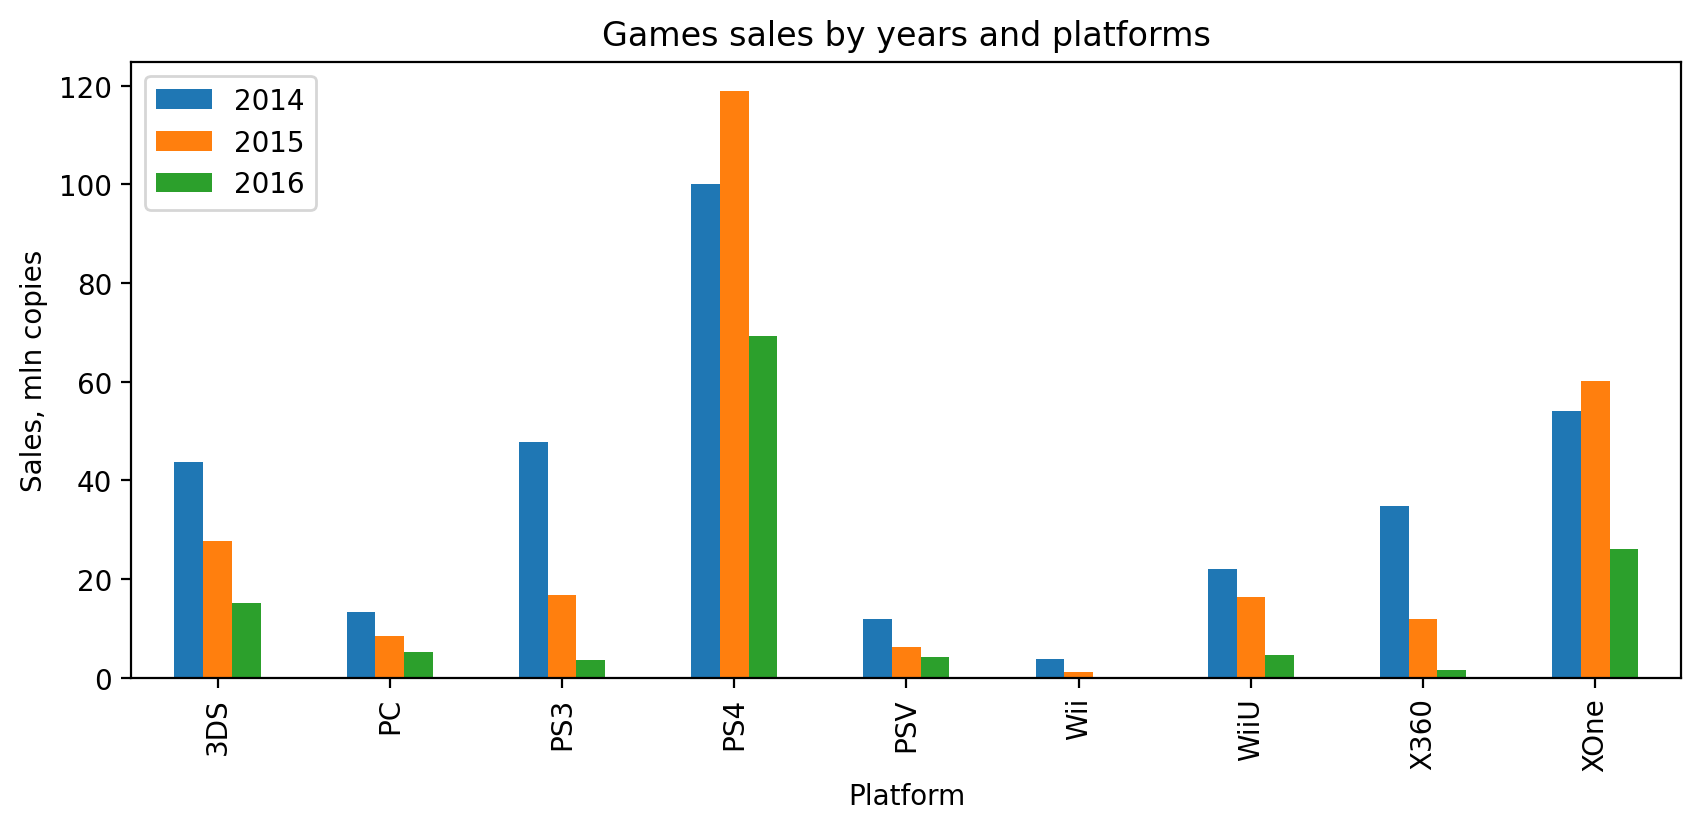

In [44]:
# build a chart
data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', 
                 aggfunc='sum').loc['2014':].dropna(axis=1).T.plot(kind='bar', figsize=(10, 4));

plt.legend(loc='upper left');
plt.title('Games sales by years and platforms');
plt.ylabel('Sales, mln copies');
plt.xlabel('Platform');
plt.show()

**Conclusion:**
* By 2016 only 9 platforms left, which are live for the last 4 years:
    * Nintendo: 3DS, Wii, WiiU
    * Playstation: PS3 / PS4 / PSV
    * Xbox: X360, XOne
* Previous generation platforms: X360, PS3, Wii
* New platforms: PS4, XOne
* Questionable: 
    * 3DS as 6 years on a market. Should be new release soon
    * WiiU as Sales are very poor
    * PSV also due to low Sales
 

Top selling platforms are (4): 
  * `PS4`, `XOne` - new platforms
  * `3DS` potentially will be a new platforms launch soon
  * `PC` forever alive
  
Relevant period is set as 2014-2016 what represent actual market state

In [45]:
# Now we filter the core df `data` from 2014
data = data[data['year_of_release'] >= 2014]
data.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score rating  total_sales  
31         NaN    NaN        14.63  
42        83.0      M        12.62  
47         NaN    NaN        11.68  
77        43.0      E         8.58  
87         NaN    NaN         7.98

### Analysis by Games

* Let's build a boxplot with global games sales by platforms and describe it
* Identify the effect of scores on game sales (potentially build a scatter plot and describe) 
* Check findings across the platforms
* Check games distribution by genres

#### Sales by platforms

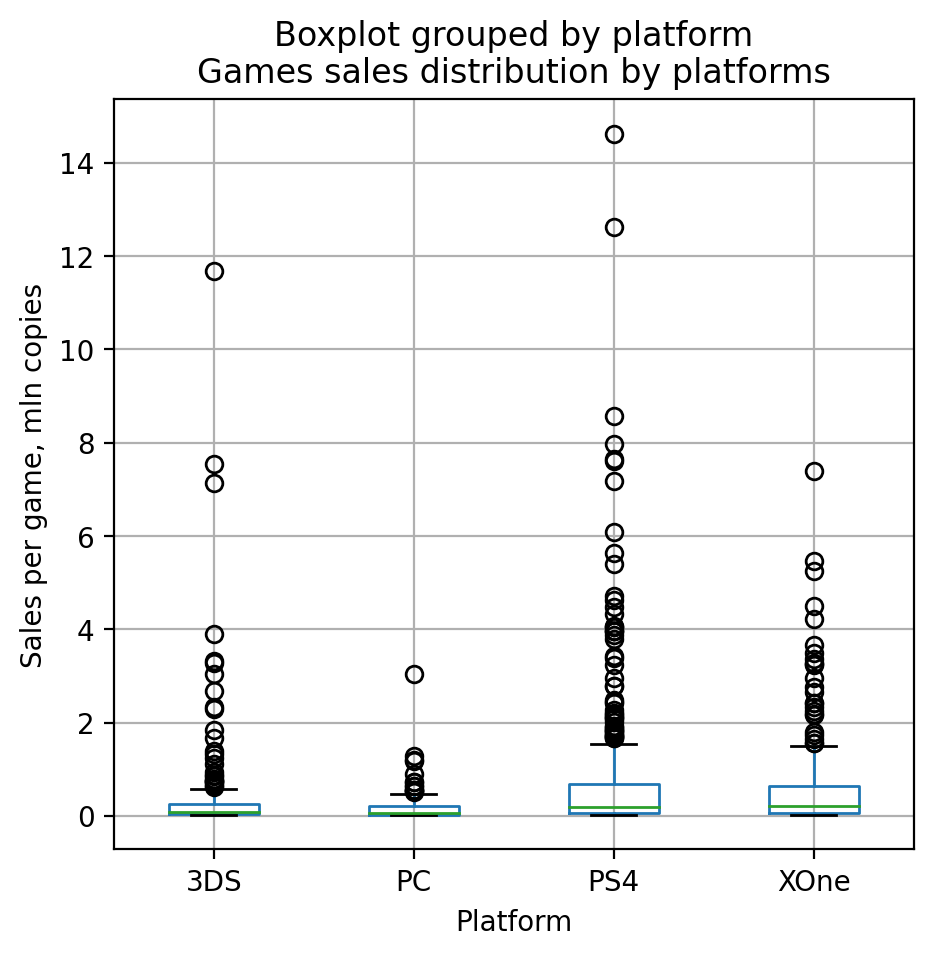

In [46]:
data.query('platform == ["PS4", "PC", "XOne", "3DS"]').boxplot(column='total_sales', by='platform', figsize=(5, 5));
plt.title('Games sales distribution by platforms');
plt.xlabel('Platform');
plt.ylabel('Sales per game, mln copies');

Majority of the games is sold with moderate amount of copies sold

Games with multi-millions sales are runouts at the boxplots

Let's build a separate boxplot for games with <1.5 mln copies sold

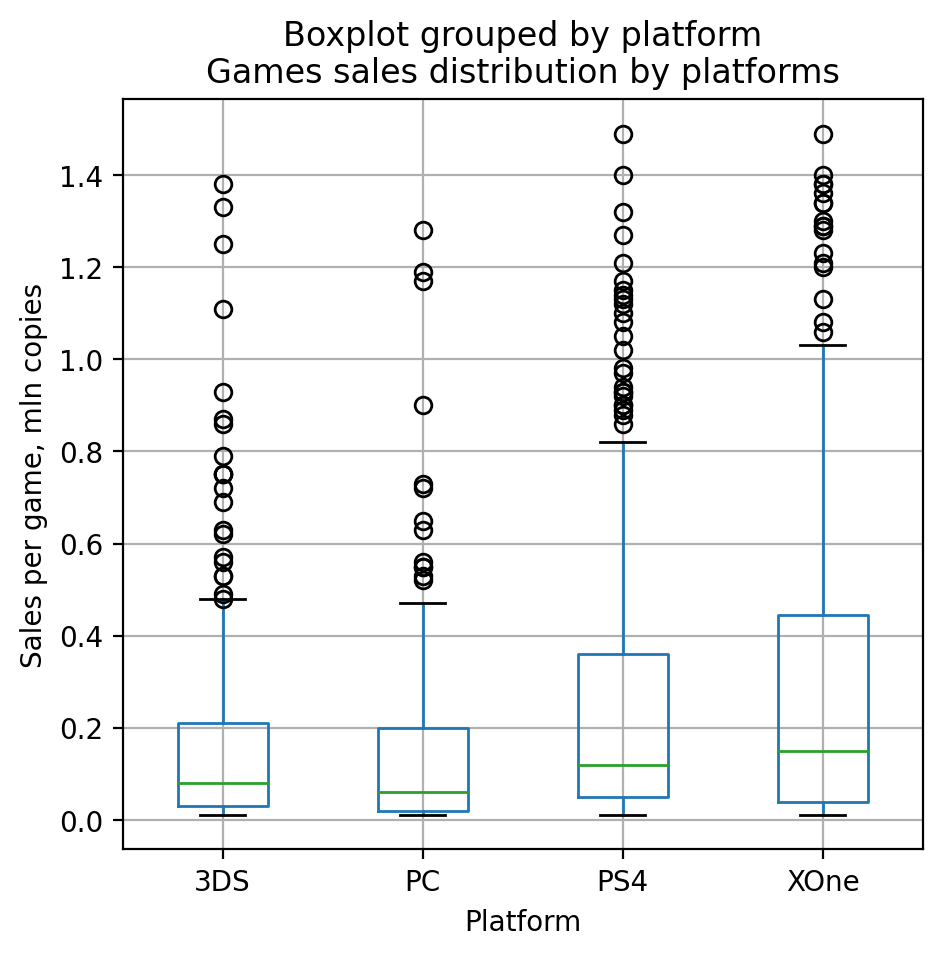

In [47]:
(data.query('platform == ["PS4", "PC", "XOne", "3DS"]')
.query('total_sales < 1.5').boxplot(column='total_sales', by='platform', figsize=(5, 5)));
plt.title('Games sales distribution by platforms');
plt.xlabel('Platform');
plt.ylabel('Sales per game, mln copies');

**Conclusion:**

* Median of game sales per each platform is not higher than 200k 
* PS4 and XOne have higher median (100-150k), than PC and 3DS (50-70k)

#### Review impact on sales in platforms

* Check the impact of scores (users and critics) within a single popular platform

Let's build a scatter plot for PS4

In [48]:
# new def `platform_plot` to draw the charts by platforms 

def platform_plot(plat):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    data.query('platform == @plat')[['total_sales','critic_score']].plot(kind='scatter', 
                                                                         x='total_sales', 
                                                                         y='critic_score', 
                                                                         alpha=0.5,
                                                                         ax= ax1,
                                                                         title='Critic Scores impact on Sales',
                                                                         xlabel='Sales, mln copies',
                                                                         ylabel='Critic scores');

    data.query('platform == @plat')[['total_sales','user_score']].plot(kind='scatter', 
                                                                         x='total_sales', 
                                                                         y='user_score', 
                                                                         alpha=0.5,
                                                                         ax= ax2,
                                                                         title='User Scores impact on Sales',
                                                                         xlabel='Sales, mln copies',
                                                                         ylabel='User scores');
    fig.suptitle(plat, fontsize="x-large");
    plt.show()
    print('Correlation between scores and sales:')
    return data.query('platform == @plat')[['total_sales','critic_score', 'user_score']].corr()

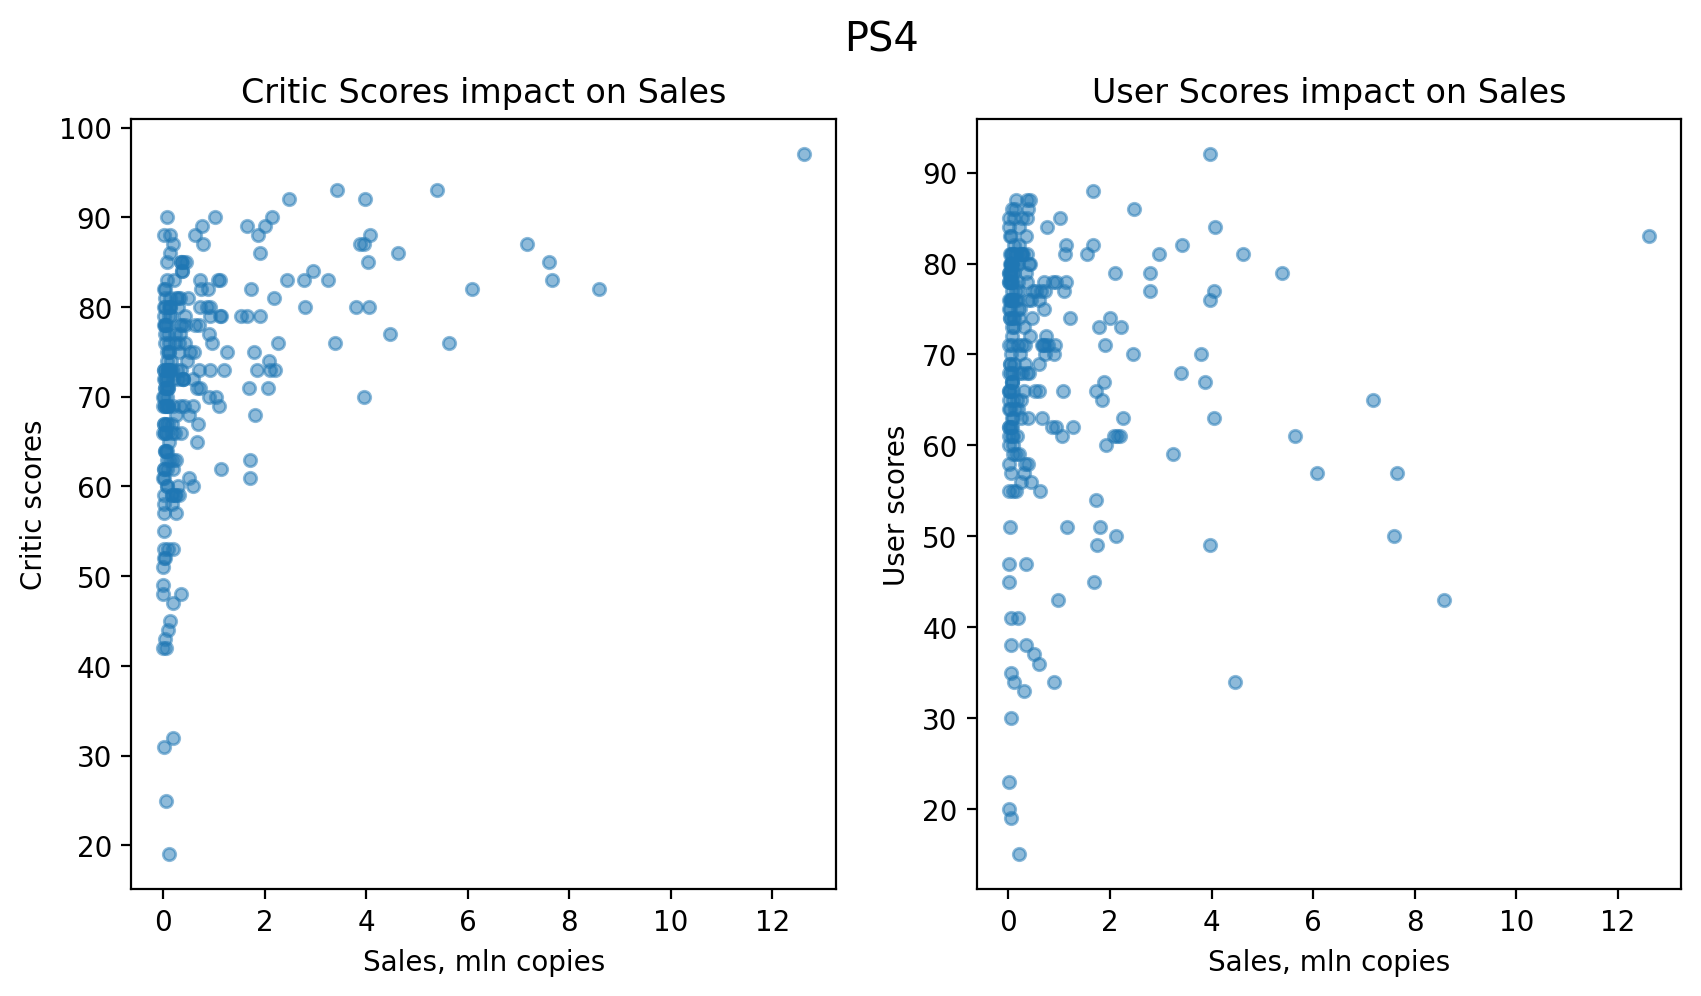

Correlation between scores and sales:


total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000

In [49]:
# for PS4
platform_plot("PS4")

* As per corr PS4 sales are mainly influenced by critic scores (0.4) doesn't by users (0.0)
* Scores distribution graph tells us that:
    * Games with high rating has more likely higher ratings
    * Critics set score higher than users
    * There are games with low ratings and high sales. This might be caused by high expectation from the game vs reality (well-spread with big popular projects)

Now looking at other platforms `XOne`, `3DS`, `PC`

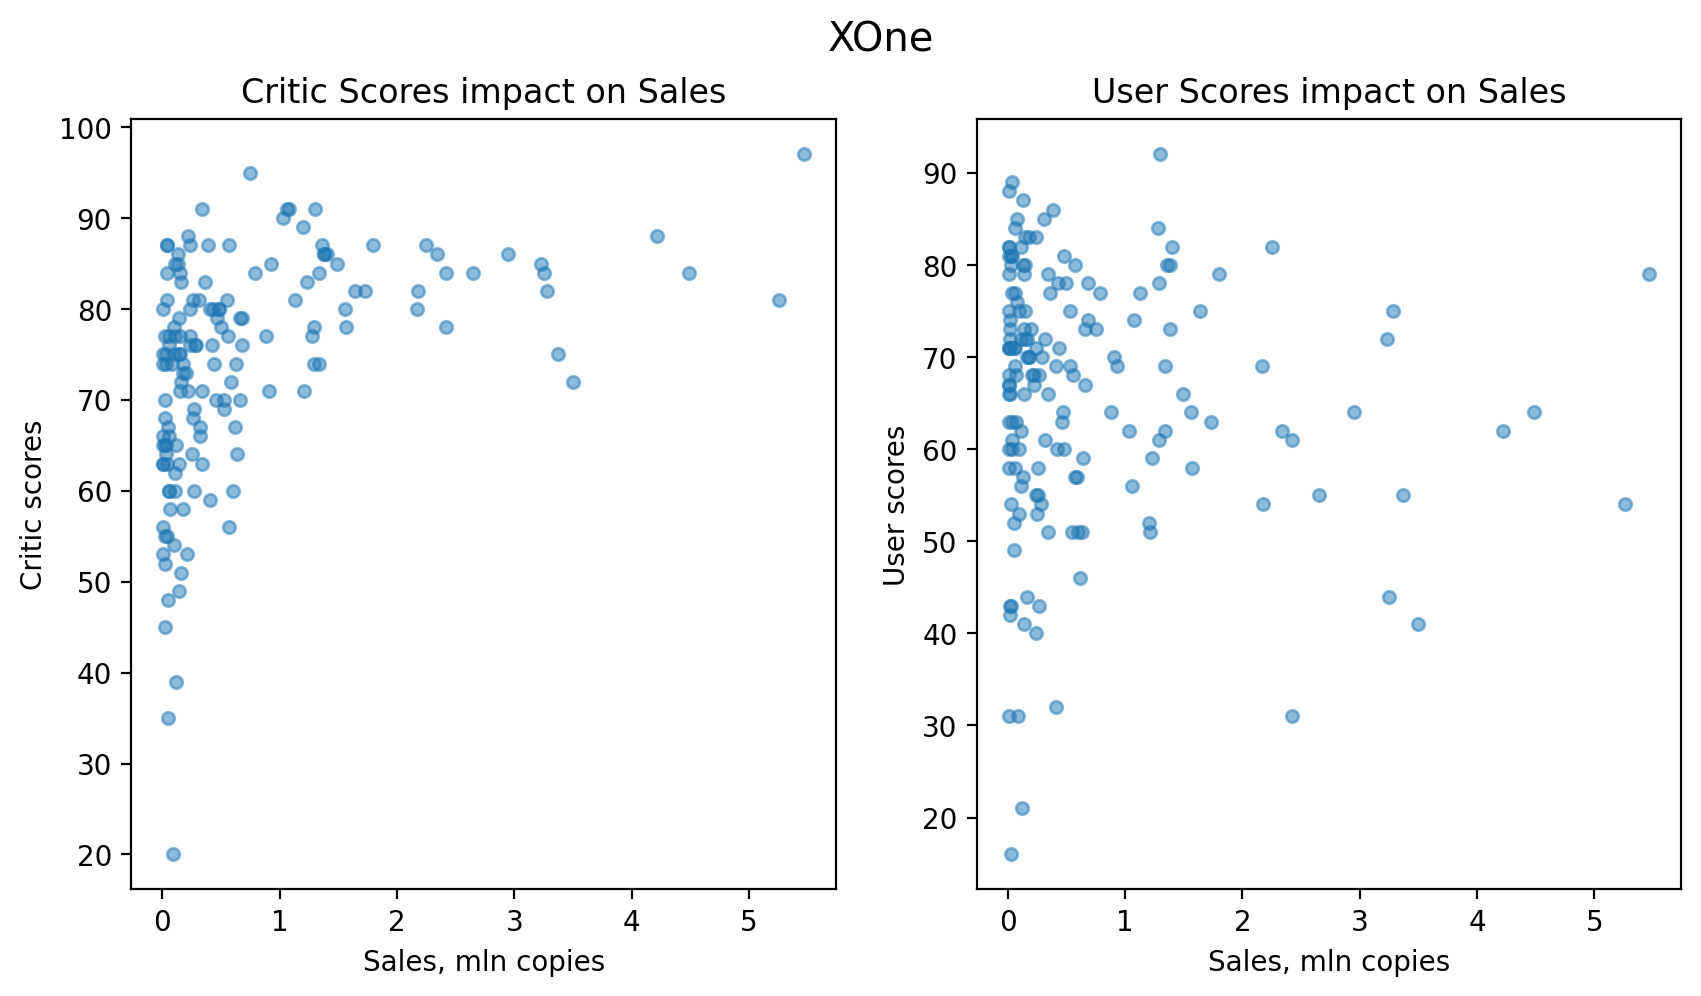

Correlation between scores and sales:


total_sales  critic_score  user_score
total_sales      1.000000      0.428677   -0.070384
critic_score     0.428677      1.000000    0.440977
user_score      -0.070384      0.440977    1.000000

In [50]:
platform_plot("XOne")

* XOne is very similar with PS4 

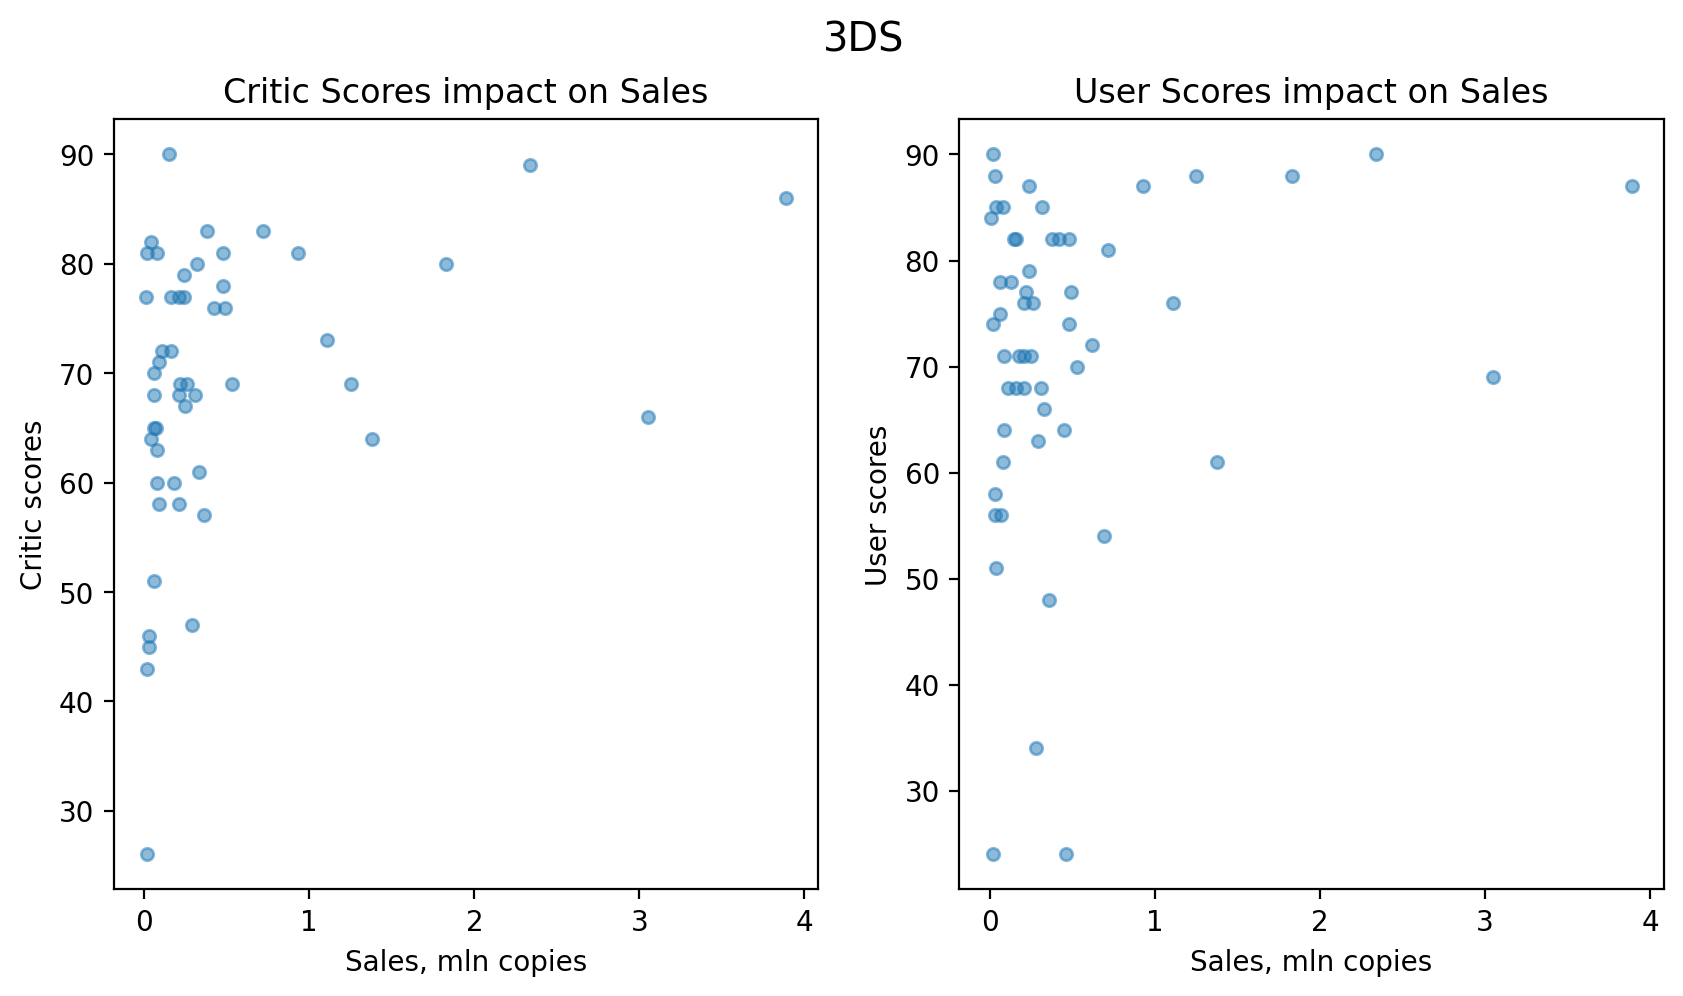

Correlation between scores and sales:


total_sales  critic_score  user_score
total_sales      1.000000      0.314117    0.215193
critic_score     0.314117      1.000000    0.862485
user_score       0.215193      0.862485    1.000000

In [51]:
platform_plot("3DS")

* In 3DS it seems like that the score impact is higher than in PS and Xbox, but still not very strong

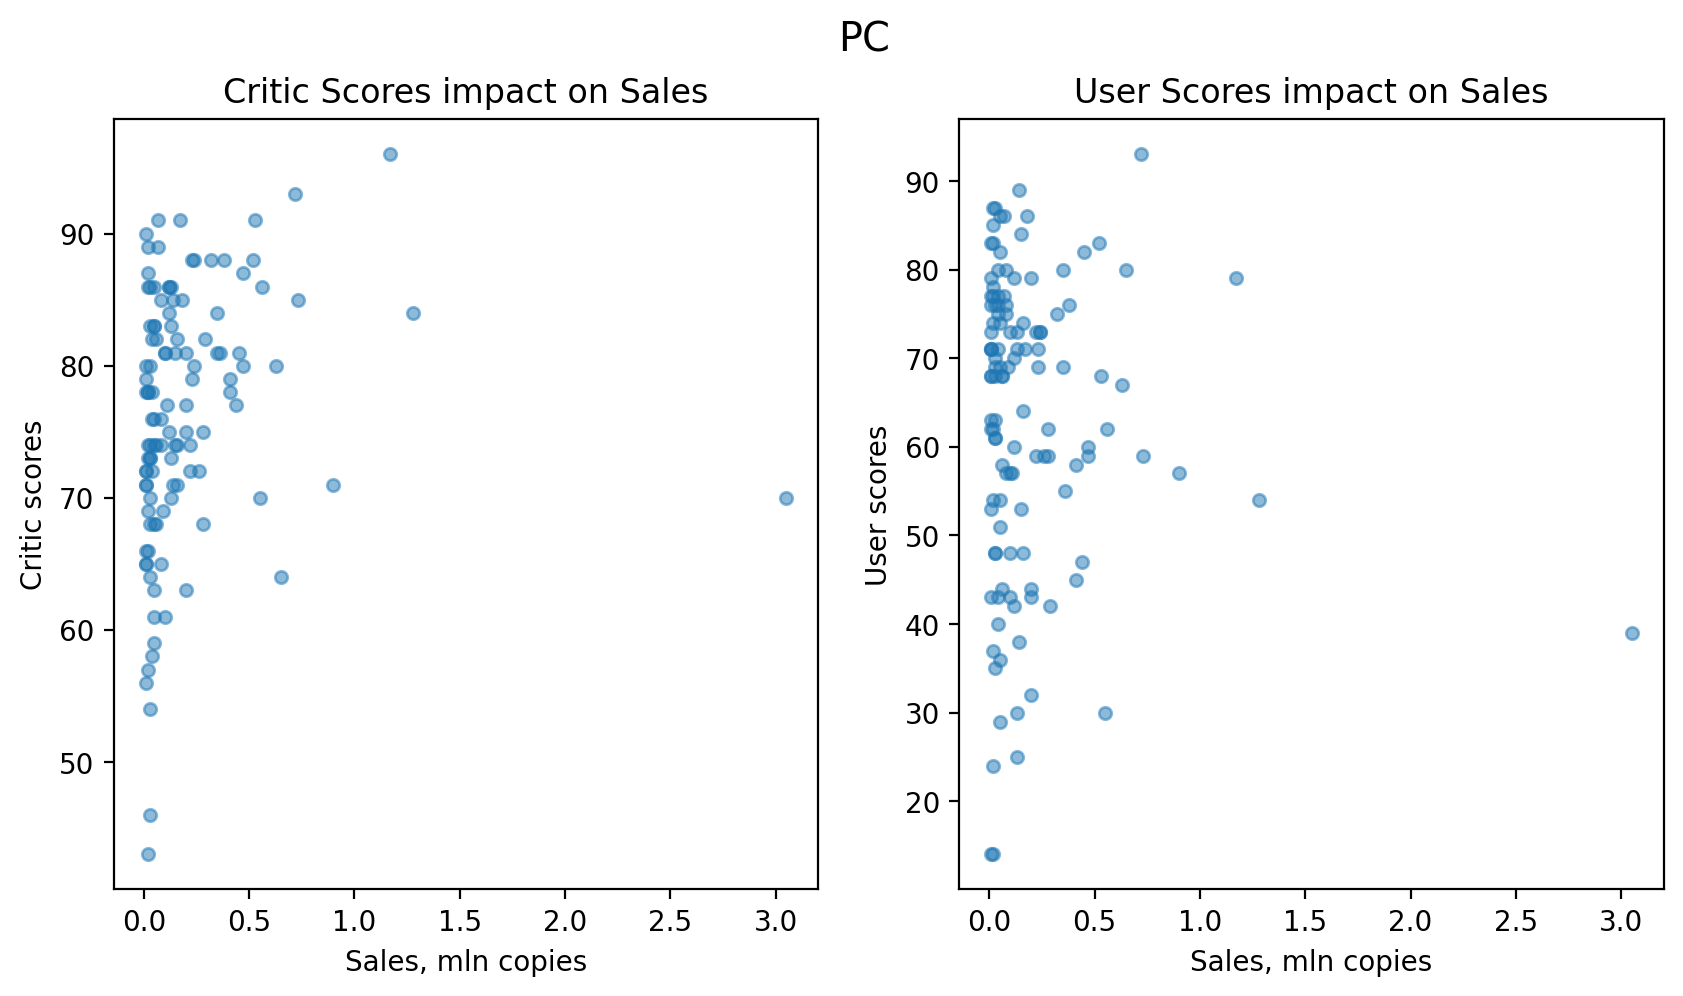

Correlation between scores and sales:


total_sales  critic_score  user_score
total_sales      1.000000      0.174634   -0.071597
critic_score     0.174634      1.000000    0.466099
user_score      -0.071597      0.466099    1.000000

In [52]:
platform_plot("PC")

* PC is similar with PS4, but critic score influencing is low

Now across all platforms

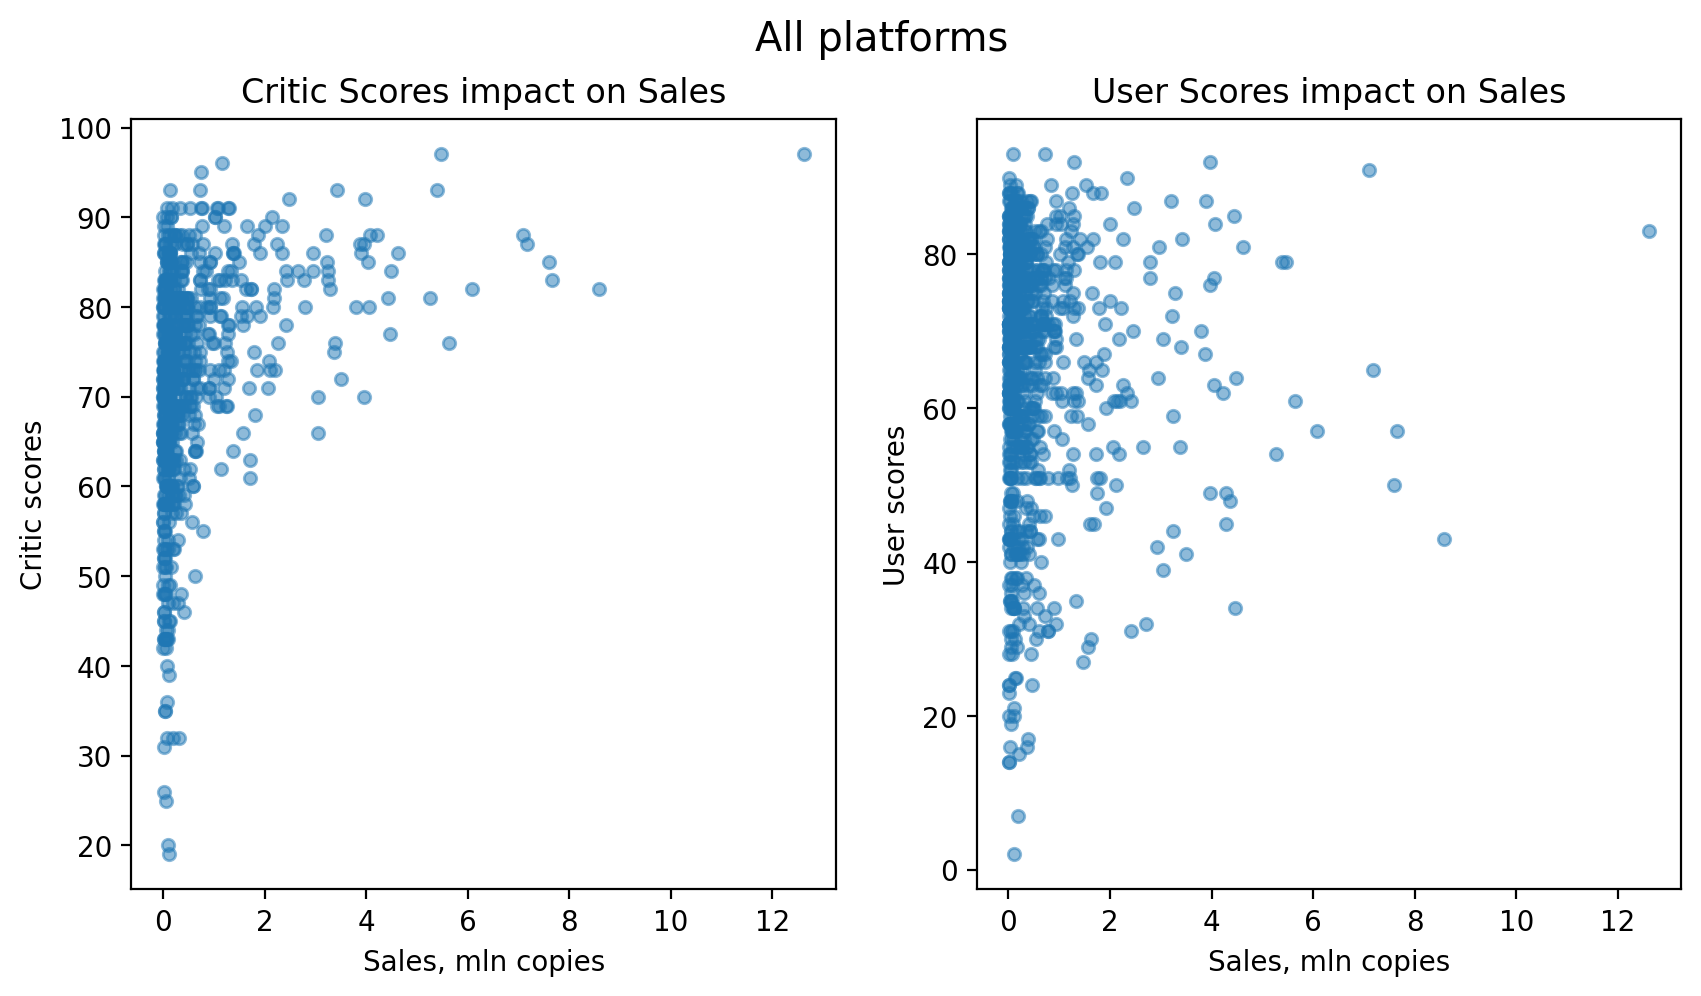

total_sales  critic_score  user_score
total_sales      1.000000      0.328105    -0.01307
critic_score     0.328105      1.000000     0.50446
user_score      -0.013070      0.504460     1.00000

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data[['total_sales','critic_score']].plot(kind='scatter', 
                                         x='total_sales', 
                                         y='critic_score', 
                                         alpha=0.5,
                                         ax= ax1,
                                         title='Critic Scores impact on Sales',
                                         xlabel='Sales, mln copies',
                                         ylabel='Critic scores');

data[['total_sales', 'user_score']].plot(kind='scatter', 
                                         x='total_sales', 
                                         y='user_score', 
                                         alpha=0.5,
                                         ax= ax2,
                                         title='User Scores impact on Sales',
                                         xlabel='Sales, mln copies',
                                         ylabel='User scores');

fig.suptitle('All platforms', fontsize="x-large");
plt.show()

data[['total_sales', 'critic_score', 'user_score']].corr()

**Conclusion:**
* Surprisingly, critic and user score doesn't have a huge effect on Sales 
* This might be explained by the following factors:
    * The game might be good but made for a small market (niche game)
    * Also we don't have the clear data about score count in both user and critic metrics
* In general critics are more likely to rate games higher than users
* Despite the platmorm top-selling games usually have high critic scores

#### Distribution by genres

Let's check **total sales** by genres

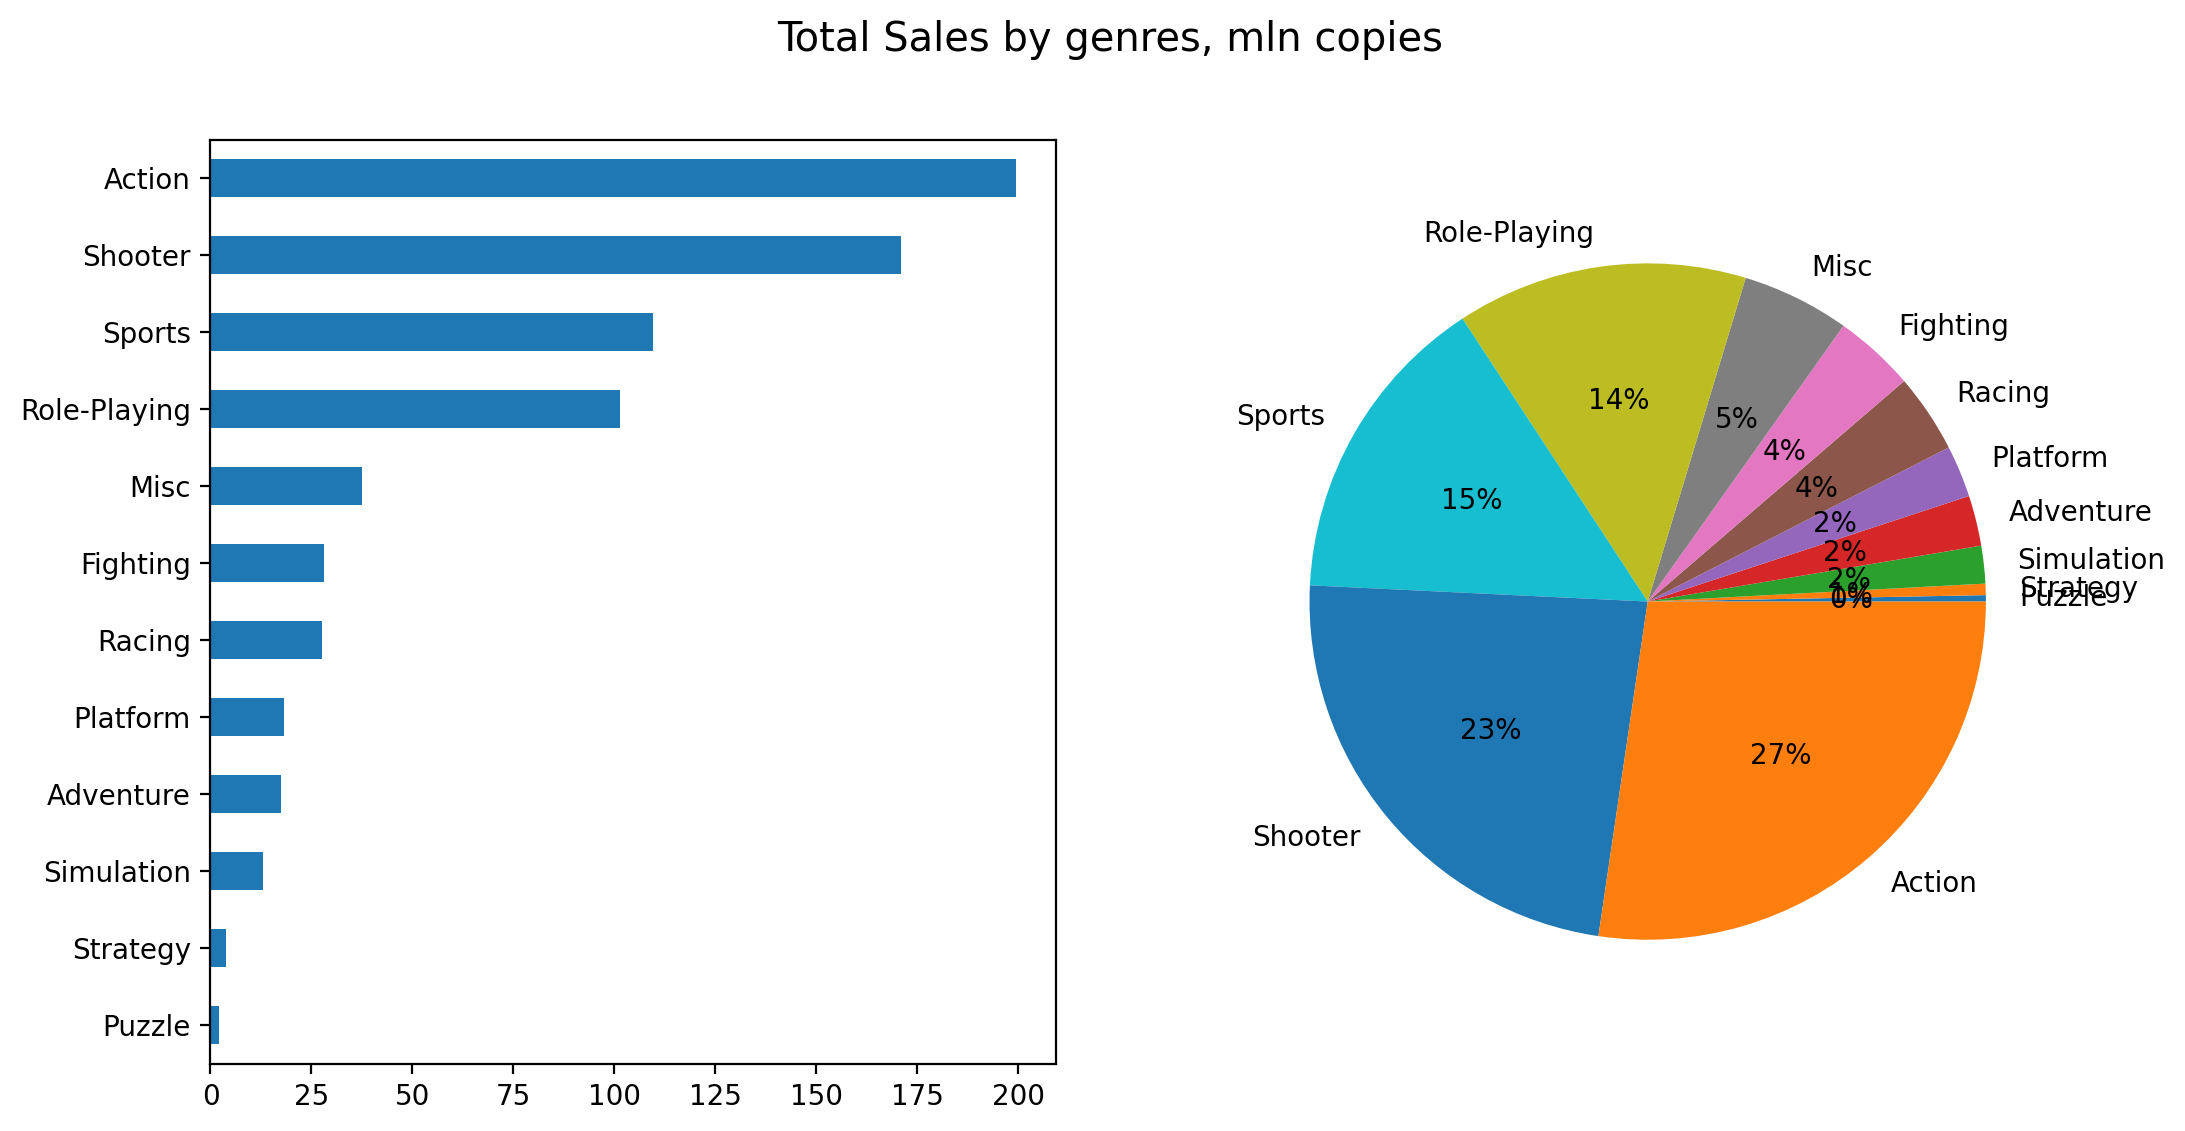

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

data.groupby('genre')['total_sales'].sum().sort_values().plot(kind='barh', 
                                                              xlabel='',
                                                              ax = ax1);

data.groupby('genre')['total_sales'].sum().sort_values().plot(kind='pie', 
                                                              autopct='%1.0f%%',
                                                              ylabel='',
                                                              ax = ax2);

fig.suptitle('Total Sales by genres, mln copies', fontsize="x-large");

And **median sales**

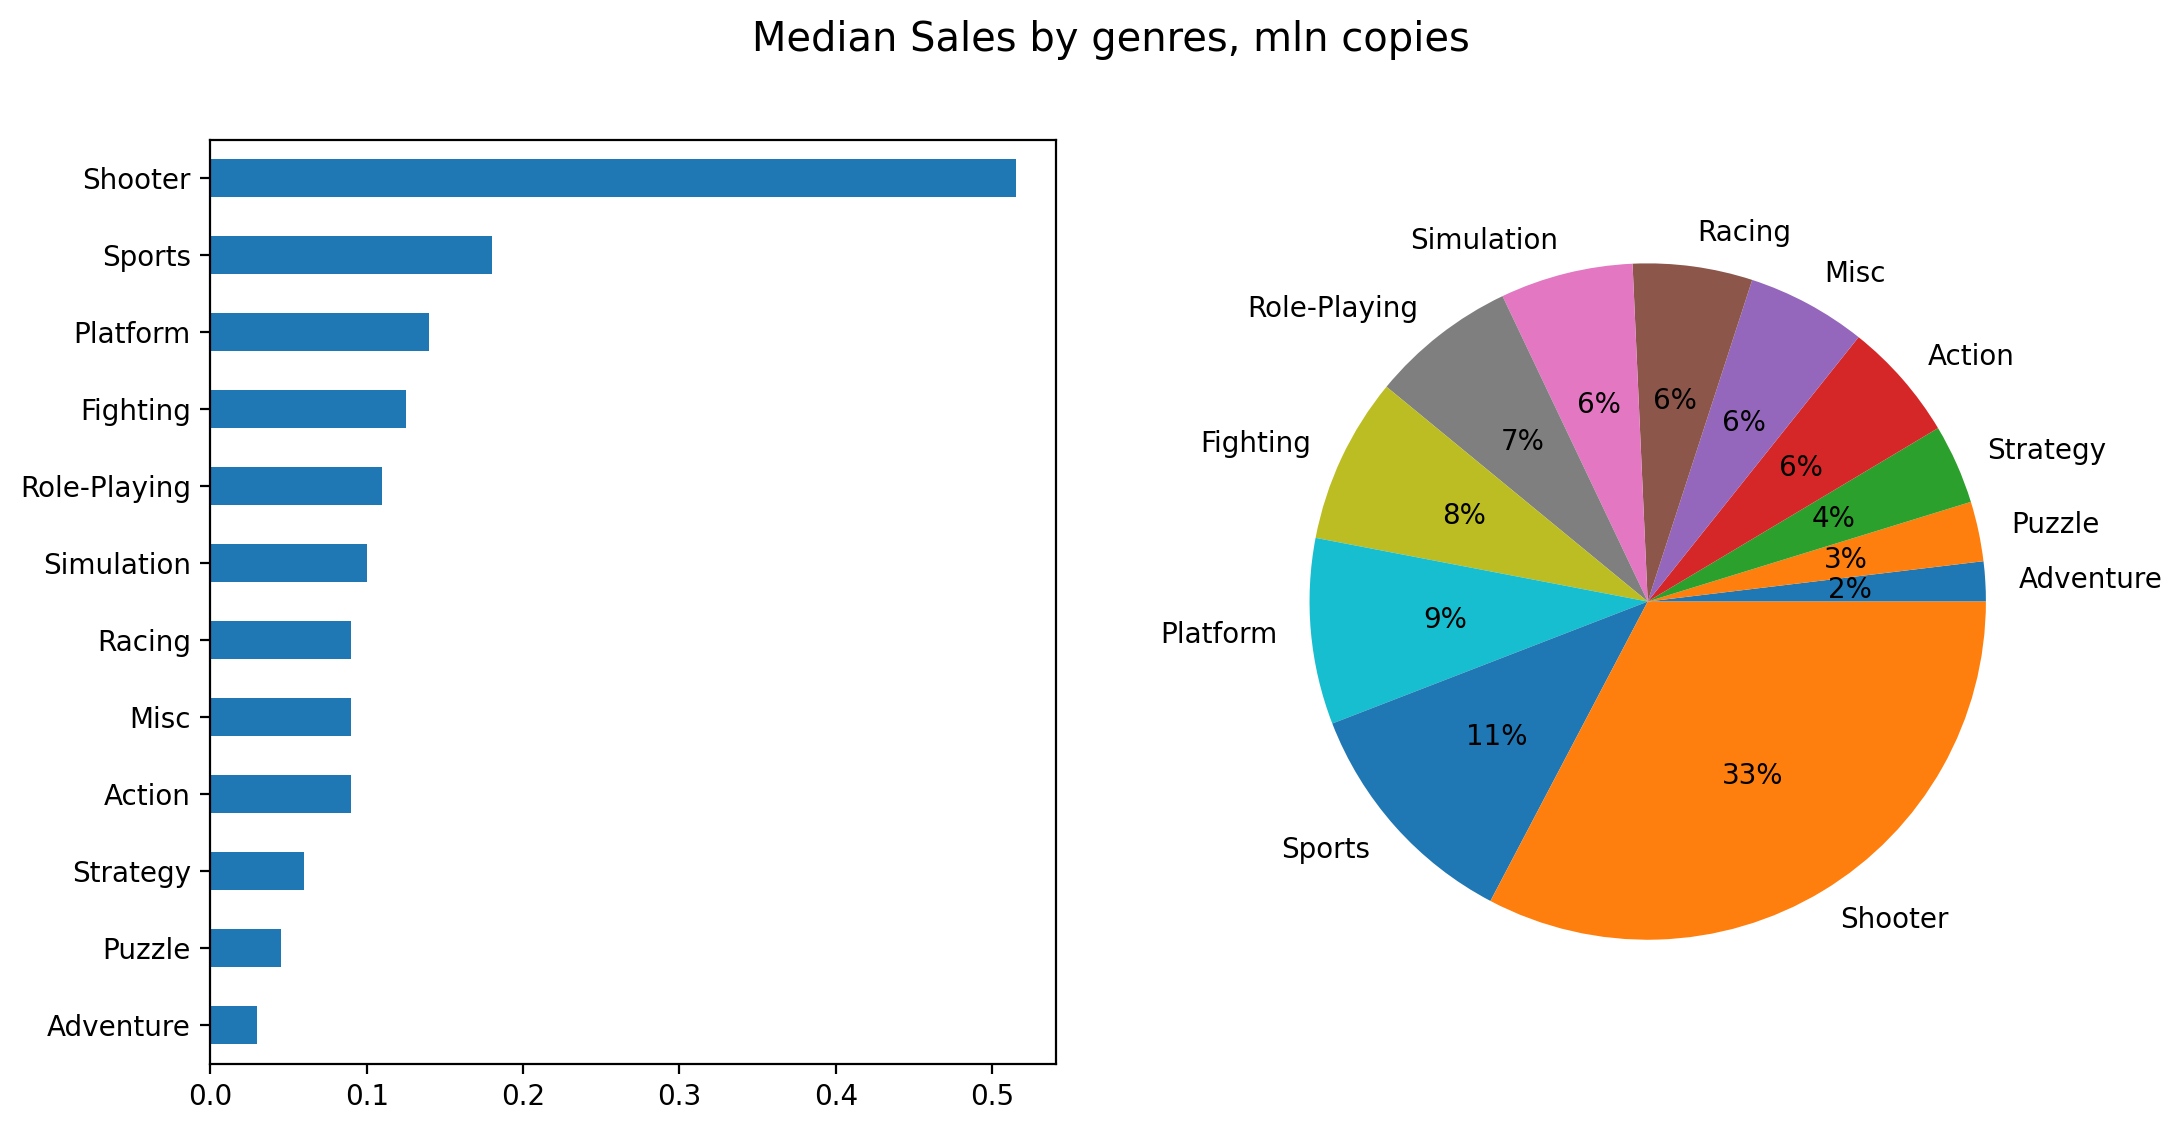

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

data.groupby('genre')['total_sales'].median().sort_values().plot(kind='barh', 
                                                                 xlabel='',
                                                                 ax = ax1);

data.groupby('genre')['total_sales'].median().sort_values().plot(kind='pie', 
                                                                 autopct='%1.0f%%',
                                                                 ylabel='',
                                                                 ax = ax2);

fig.suptitle('Median Sales by genres, mln copies', fontsize="x-large");

From **Total Sales** by genre perspective:
* Best sellers with 175 mln+ are `Action`, `Shooter`
* Then with 100+ mln: `Role-Playing`, `Sport`
* Other genres with 20-50 mln are alike
* Low sellers: `Strategy`, `Puzzle` 

But from **Median Sales** perspective the overlook is different:
* Top is `Shooter` with 0.5 mln copies / game
* Then `Sport`, `Platform`, `Fighting`
* `Action` (which is first in total sales) is now at 9th place (of 12)

It is more reasonable to focus on selling `Shooter` and `Sport`

## Create User Profile for each region
* Now we make a user profile for each region (NA, EU, JP):
    * Look at most popular platforms (top-5) and describe differences
    * Most popular genres (top-5), differences between them
    * Check the impact of ESRB rating on sales in each region

### Sales by platforms in regions

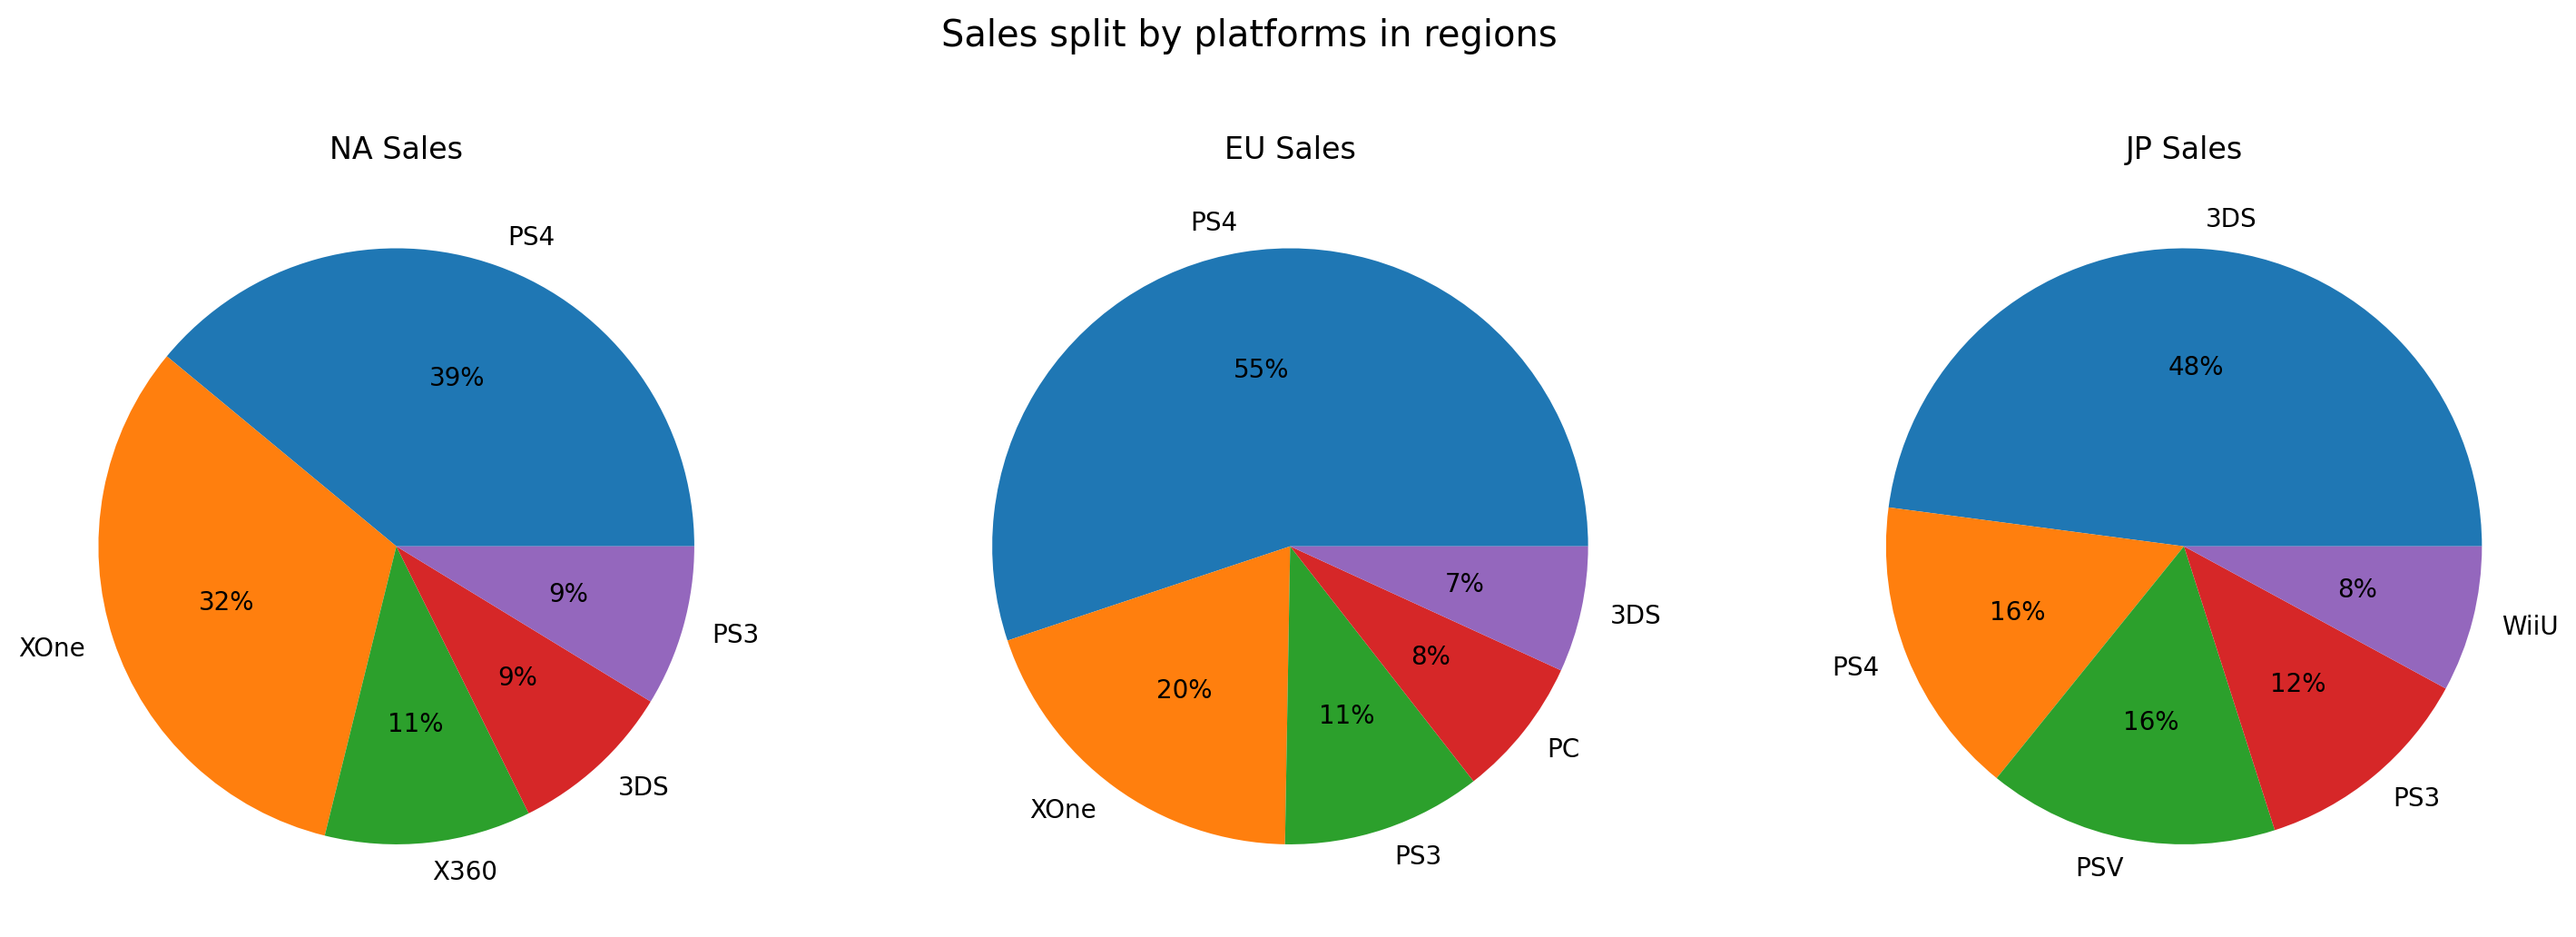

In [56]:
# drawing a figure with 3 charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# sales in NA
(data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='NA Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax1)
);

# sales in EU
(data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='EU Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax2)
);

# sales in JP
(data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='JP Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax3)
);

fig.suptitle('Sales split by platforms in regions', fontsize="x-large");
plt.show()

There is a big difference between sales in regions:
* In North America (NA) and Europe (EU) 1st is PC4 and 2nd is XOne. In EU PS4 share is significantly higher than in NA
* In Japan (JP) the leader is Nintento 3DS, 2nd and 3rd is for PS4 and PSV (which is not even in top 5 in other countries). XOne is not even in Top-5

These can be explained by target audience of platforms and games, cultular differences, marketing activities by companies (i.e. Nintendo is japanese, Xbox is american)

### Sales by platforms in genres

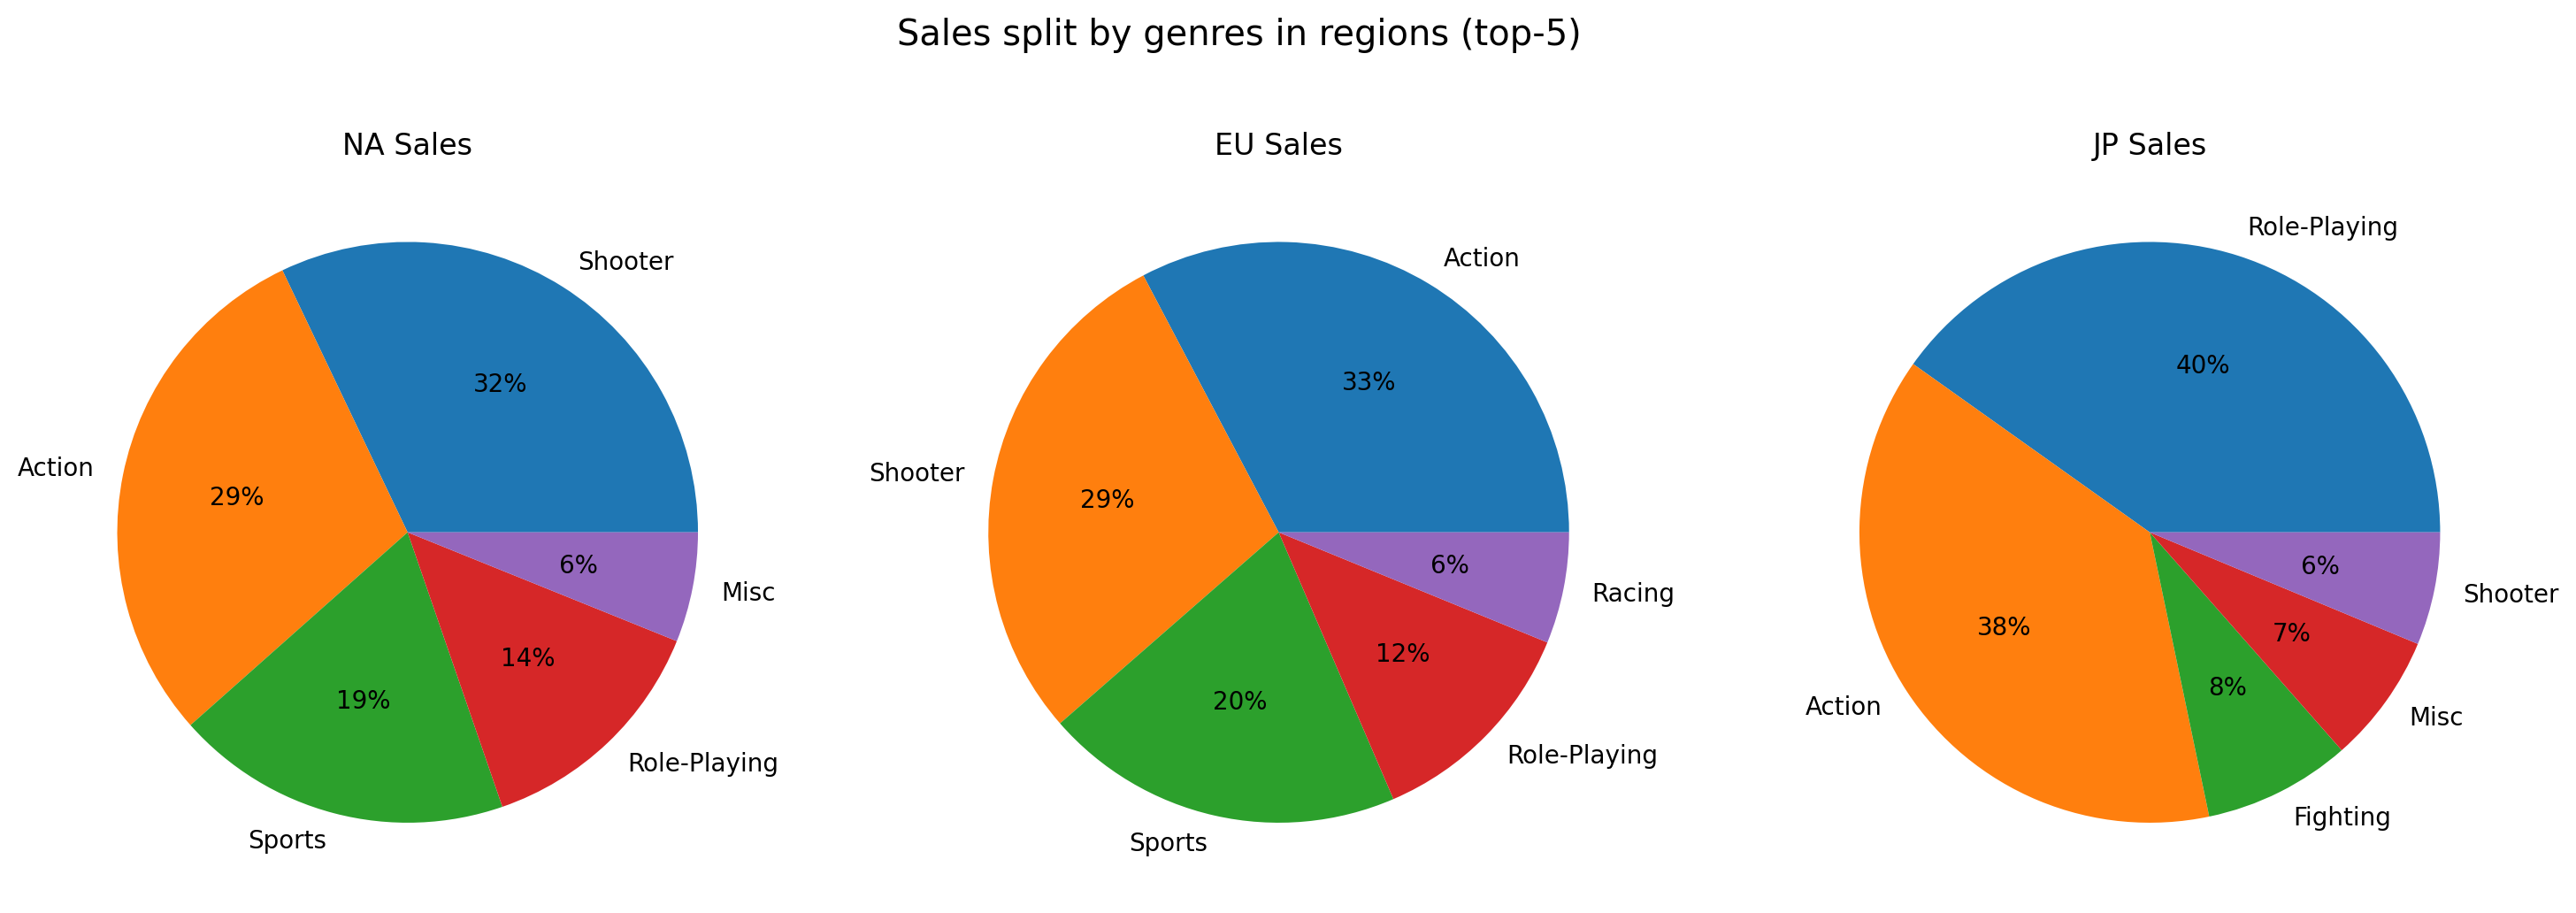

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# sales in NA
(data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='NA Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax1)
);

# sales in EU
(data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='EU Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax2)
);

# sales in JP
(data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
.plot(kind='pie', 
      title='JP Sales', 
      autopct='%1.0f%%', 
      ylabel='', 
      ax = ax3)
);

fig.suptitle('Sales split by genres in regions (top-5)', fontsize="x-large");
plt.show()

Interesting findings:
* NA and EU have splits by genres look alike but NA prefers Shooter to Action (in EU is the opposite)
* Japan market is different:
    * 1st place is for Role-Playing with 40% share
    * 2nd is for Action with 38% 
    * Sport category is not even in top-5 (while in NA and EU it has 3rd place with 20% share)
    
Probably, it's explained by difference in preferences

### ESRB rating inmpact on sales in regions

In [58]:
data['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

Meaning:
* E - everyone
* E10+ - everyone 10+
* T - teen
* M - mature (17+)

Let's fill `NaN` with `unknown` to understand which share is without rating

In [59]:
data['rating'] = data['rating'].fillna('unknown')

Now build distribution by ratings

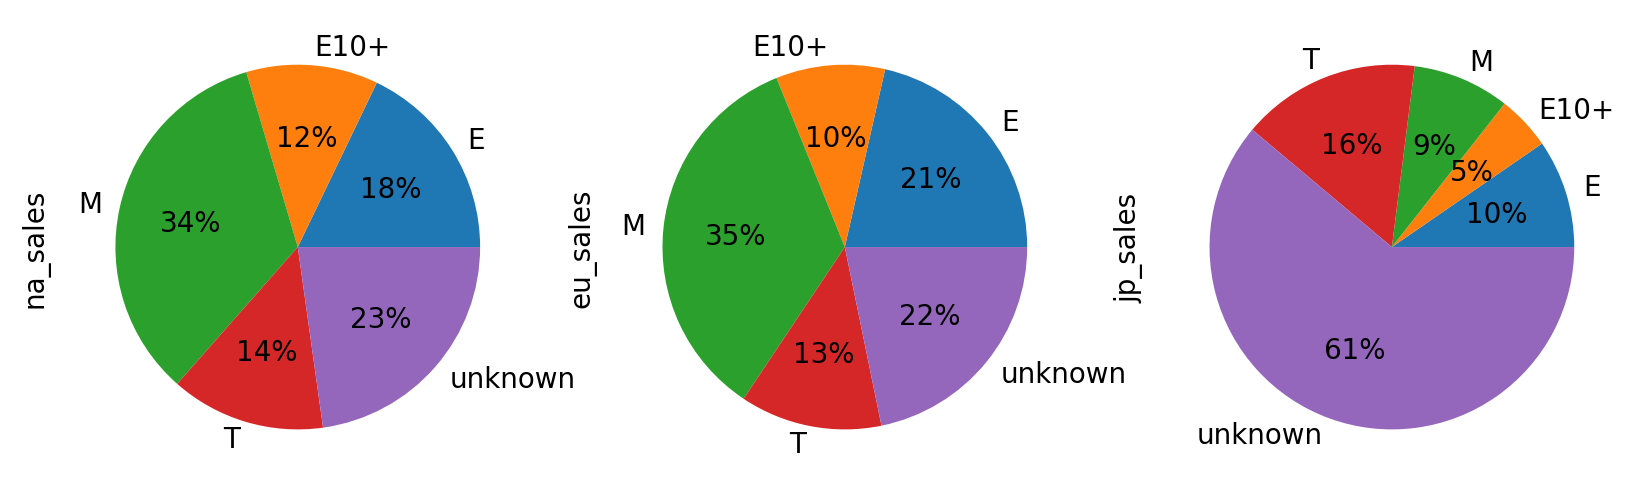

In [60]:
data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').plot.pie(subplots=True, 
                                                                                 figsize=(10, 10), 
                                                                                 legend=False, 
                                                                                 autopct='%1.0f%%'
                                                                                 );

In Japan there is a huge share without a rating. Let's have a look at dataset

In [61]:
data.query('rating == "unknown"').sort_values(by='jp_sales', ascending=False)

name platform  year_of_release  \
412                    Yokai Watch 2 Ganso/Honke      3DS             2014   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
406                             Monster Hunter X      3DS             2015   
563                       Yokai Watch 2 Shinuchi      3DS             2014   
96           Super Smash Bros. for Wii U and 3DS      3DS             2014   
...                                          ...      ...              ...   
5072                      Farming Simulator 2015      PS3             2015   
12328                              Darksiders II     XOne             2015   
4887                              Dark Souls III     XOne             2016   
12384            The Amazing Spider-Man 2 (2014)      3DS             2014   
11524      Sherlock Holmes: Crimes & Punishments     XOne             2014   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
412    Role-Playing      0.09      0.00      3.18         0.01           NaN   
47     Role-Playing      4.35      3.49      3.10         0.74           NaN   
406          Action      0.27      0.21      2.79         0.05           NaN   
563    Role-Playing      0.00      0.00      2.68         0.00           NaN   
96         Fighting      3.27      1.37      2.43         0.48           NaN   
...             ...       ...       ...       ...          ...           ...   
5072     Simulation      0.11      0.20      0.00         0.06           NaN   
12328        Action      0.04      0.02      0.00         0.01           NaN   
4887   Role-Playing      0.26      0.09      0.00         0.04          87.0   
12384        Action      0.03      0.03      0.00         0.01           NaN   
11524     Adventure      0.03      0.04      0.00         0.01           NaN   

       user_score   rating  total_sales  
412           NaN  unknown         3.28  
47            NaN  unknown        11.68  
406           NaN  unknown         3.32  
563           NaN  unknown         2.68  
96            NaN  unknown         7.55  
...           ...      ...          ...  
5072          NaN  unknown         0.37  
12328         NaN  unknown         0.07  
4887         86.0  unknown         0.39  
12384         NaN  unknown         0.07  
11524         NaN  unknown         0.08  

[749 rows x 12 columns]

Once again NA and EU markets look alike (slight difference in E/E10+/T):
* 1st place is for `Mature` with 34-35% share, then 18-21% for all others
* Unknown is 22-23%

But in Japan:
* Unknown is 61%!
* Then Teen 13+ with 16%, E with 10% and Mature with 9%

High share of Unknown is potentially explained that in Japan there is a separate rating system (CERO) which is not represented in our data (check with data collection team)

As for the rest,
Japan players are mostly teenagers or this category is more popular (than in NA and EU where Shooters are more preferable)

## Hypothesis check
* Here we need to check 2 hypothesis

**Hypothesis 1:** Average user scores of `XOne` and `PC` platforms are equal

* H_0: User scores (user_score) of "PC" platform = User scores (user_score) of "XOne" platform
* H_a: User scores (user_score) of "PC" platform ≠ User scores (user_score) of "XOne" platform
* alpha = 0.05 (optimal)

As we check equality of 2 populations so we need to use the method: `scipy.stats.ttest_ind()`

In [62]:
alpha = 0.05

results = st.ttest_ind(data.query('platform == "PC"')['user_score'],
                       data.query('platform == "XOne"')['user_score'],
                       equal_var=False, # no evidence of equal dispersions
                       nan_policy='omit') 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Zero-hypothesis is declined')
else:
    print('Zero-hypothesis is not declined')

p-value: 0.11601398086668921
Zero-hypothesis is not declined


**Conclusion:**
* Hypothesis about equality of average user score between `XOne` and `PC` platforms **is not declined**

**Hypothesis 2:** Average user scores of `Action` and `Sports` genres are equal
* H_0: User scores (user_score) of "Action" genre = User scores (user_score) of "Sport" genre
* H_a: User scores (user_score) of "Action" genre ≠ User scores (user_score) of "Sport" genre
* alpha = 0.05 (optimal)

As we check equality of 2 populations so we need to use the method: `scipy.stats.ttest_ind()`

In [63]:
alpha = 0.05

results = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(),
                       data.query('genre == "Sports"')['user_score'].dropna(),
                       equal_var=False) # no evidence of equal dispersions

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Zero-hypothesis is declined')
else:
    print('Zero-hypothesis is not declined')

p-value: 1.182555038264477e-14
Zero-hypothesis is declined


**Conclusion:**
* Hypothesis about equality of average user score between `Action` and `Sport` genres **is declined**

## Final Conclusion

### Gaming insudtry in general
* Gaming industry is a dynamic market
* During many year the industry has growing periods 1995-2009 and decreasing 2010-16

<div>
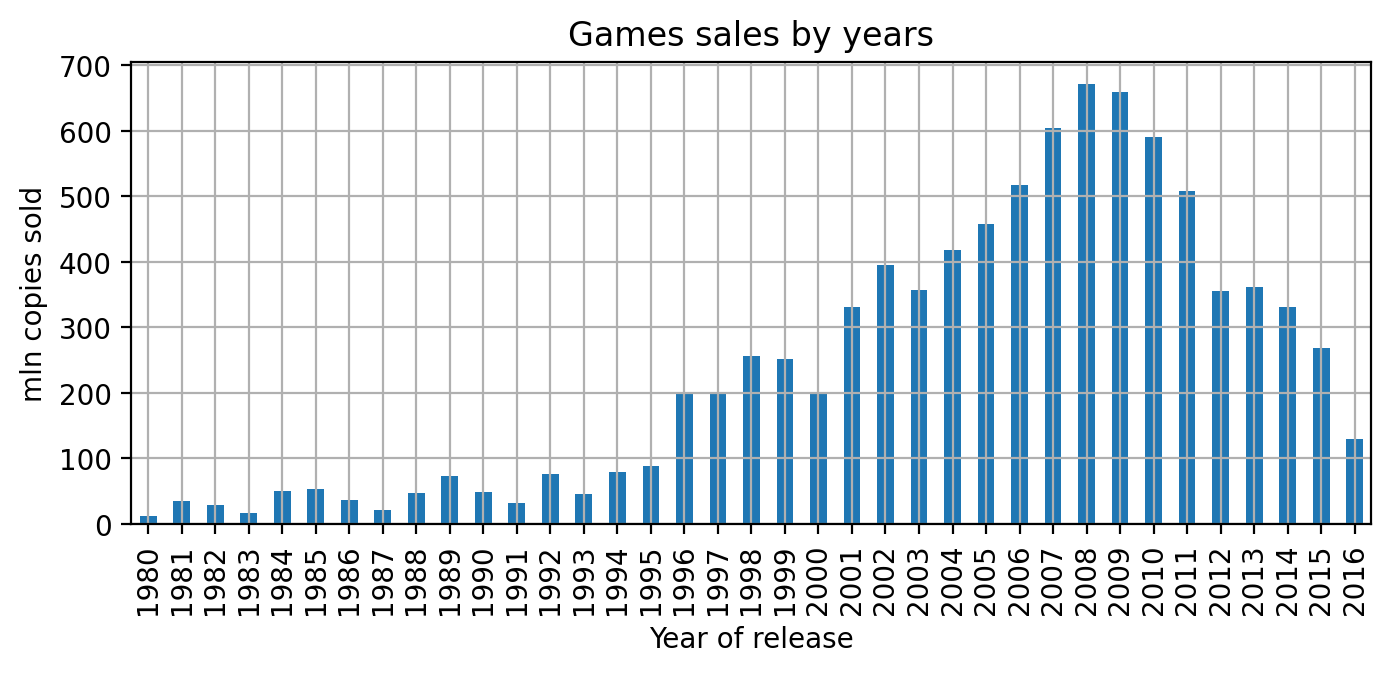
</div>


- There are 3 big consoles on the market: Playstation, Xbox, Nintendo
- Each manufacturer anounces new platform each 7 years. Lifetime cycle of a platform is about 10 years
- Chart below represents top-10 selling platforms lyfecycles by years

<div>
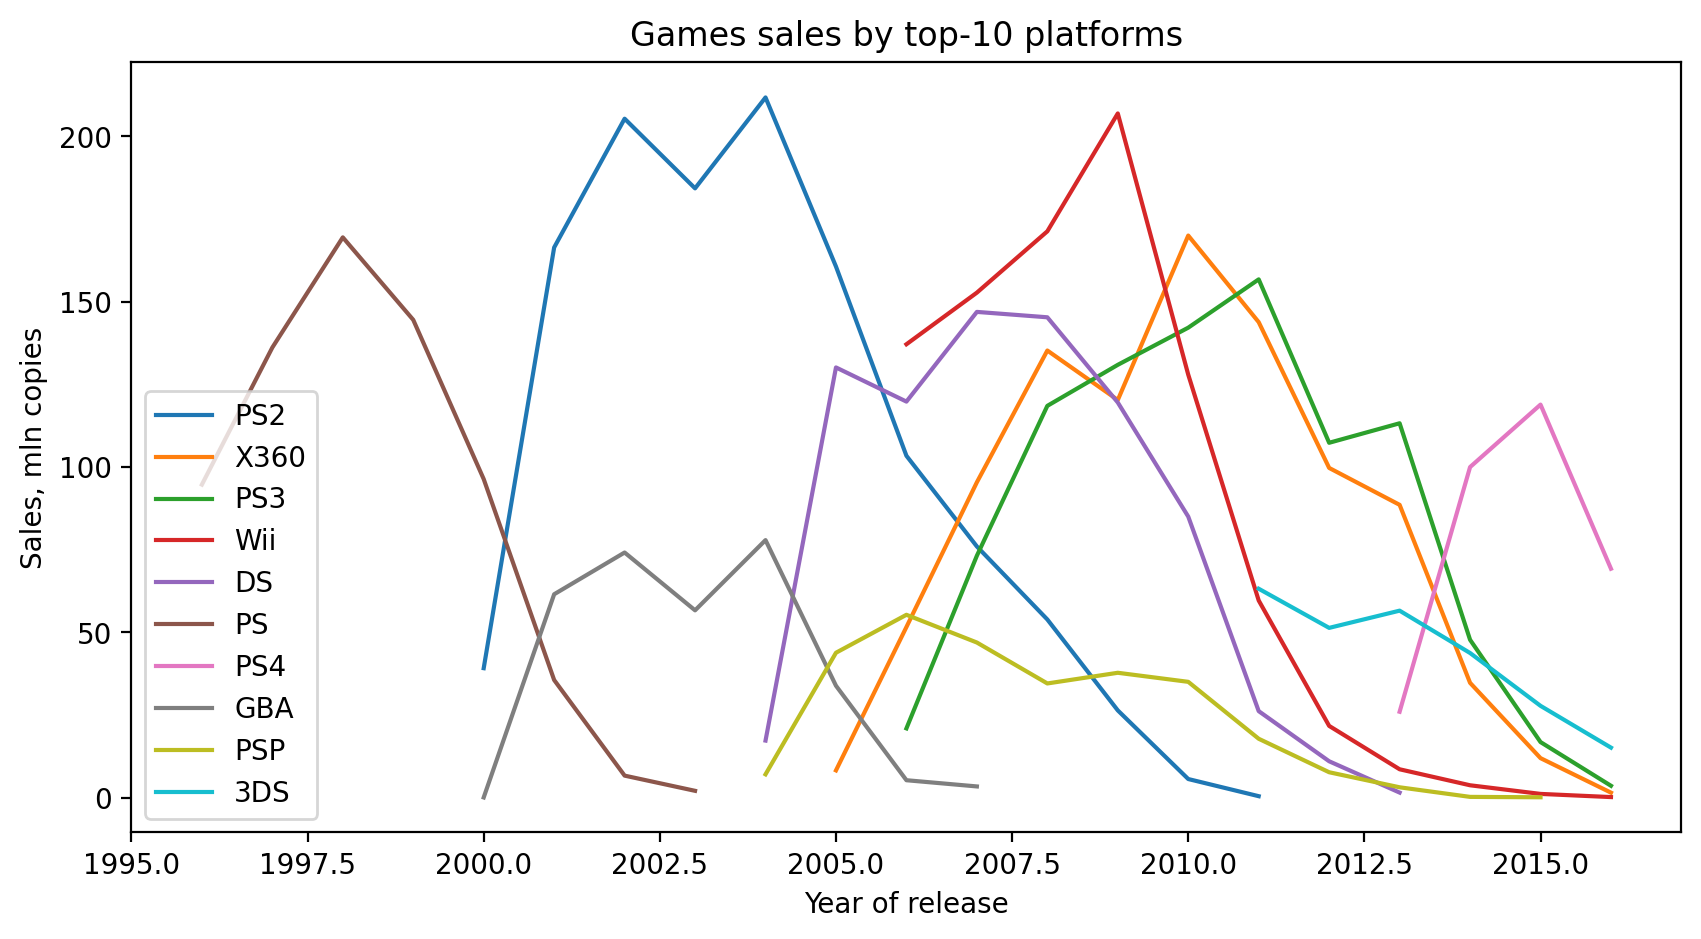
</div>


- By 2016 PS and Xbox released new platforms. Nintendo 3DS is on 6th year, so new platform should be announced soon (in 1-2 years)
- For the last 3 years PS4 is an absolute leader, then goes Xbox and 3DS
- Immortable PC is 4th
- **For sales planning of our shop we should first focus on the top selling platforms**

<div>
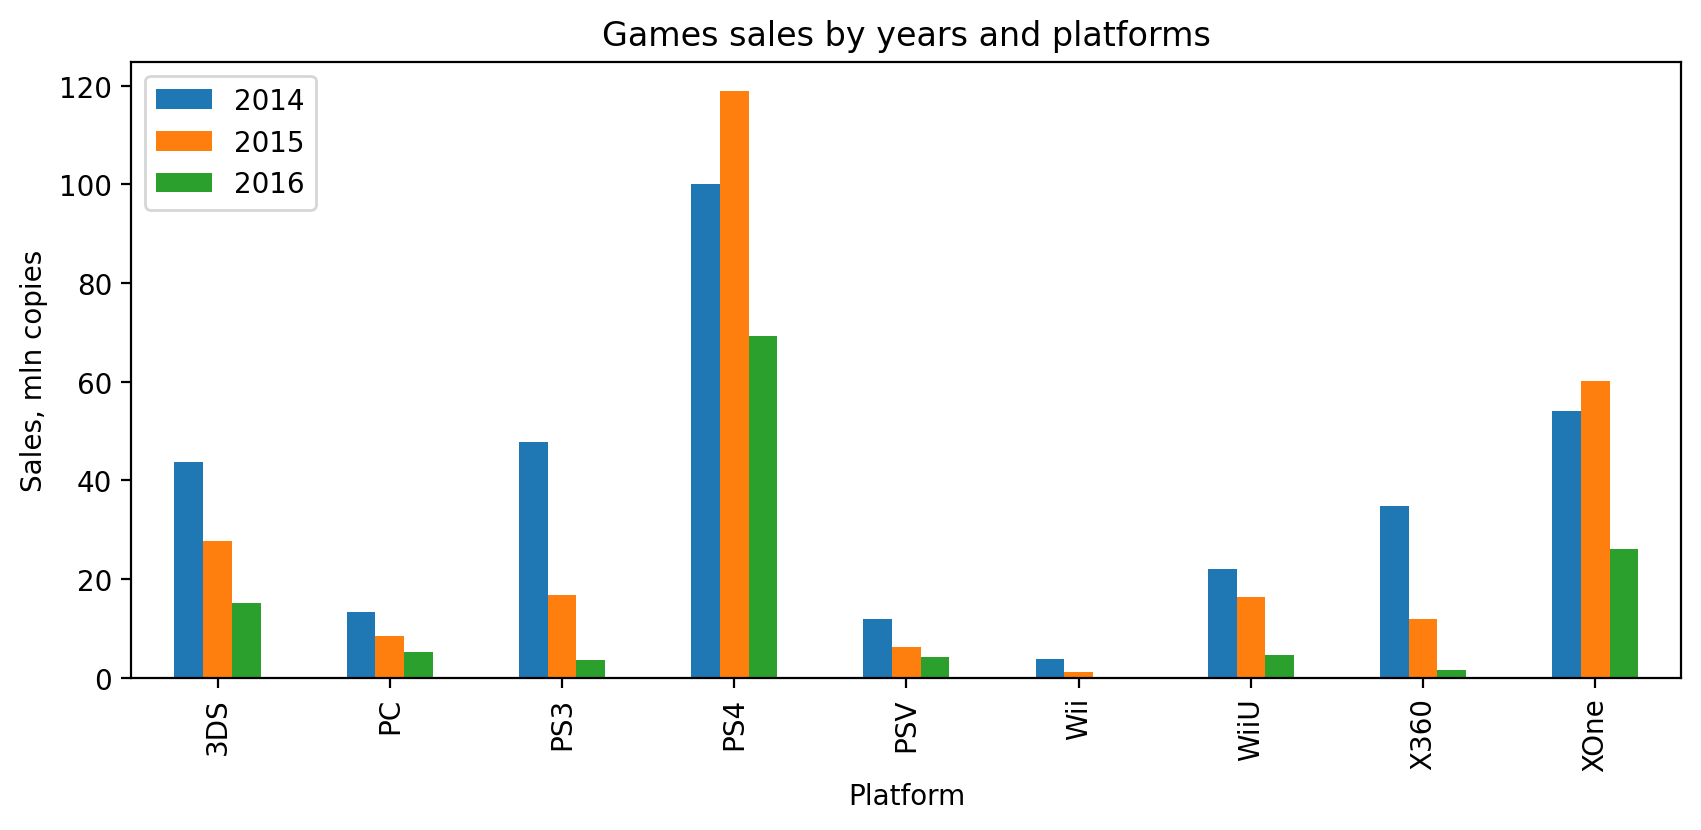
</div>

### Current market overview:
* By **Genres**, the highest median sales in `Shooter` (33%)
* After that goes`Sports` and `Platform` with 11% and 9% shares respectively

<div>
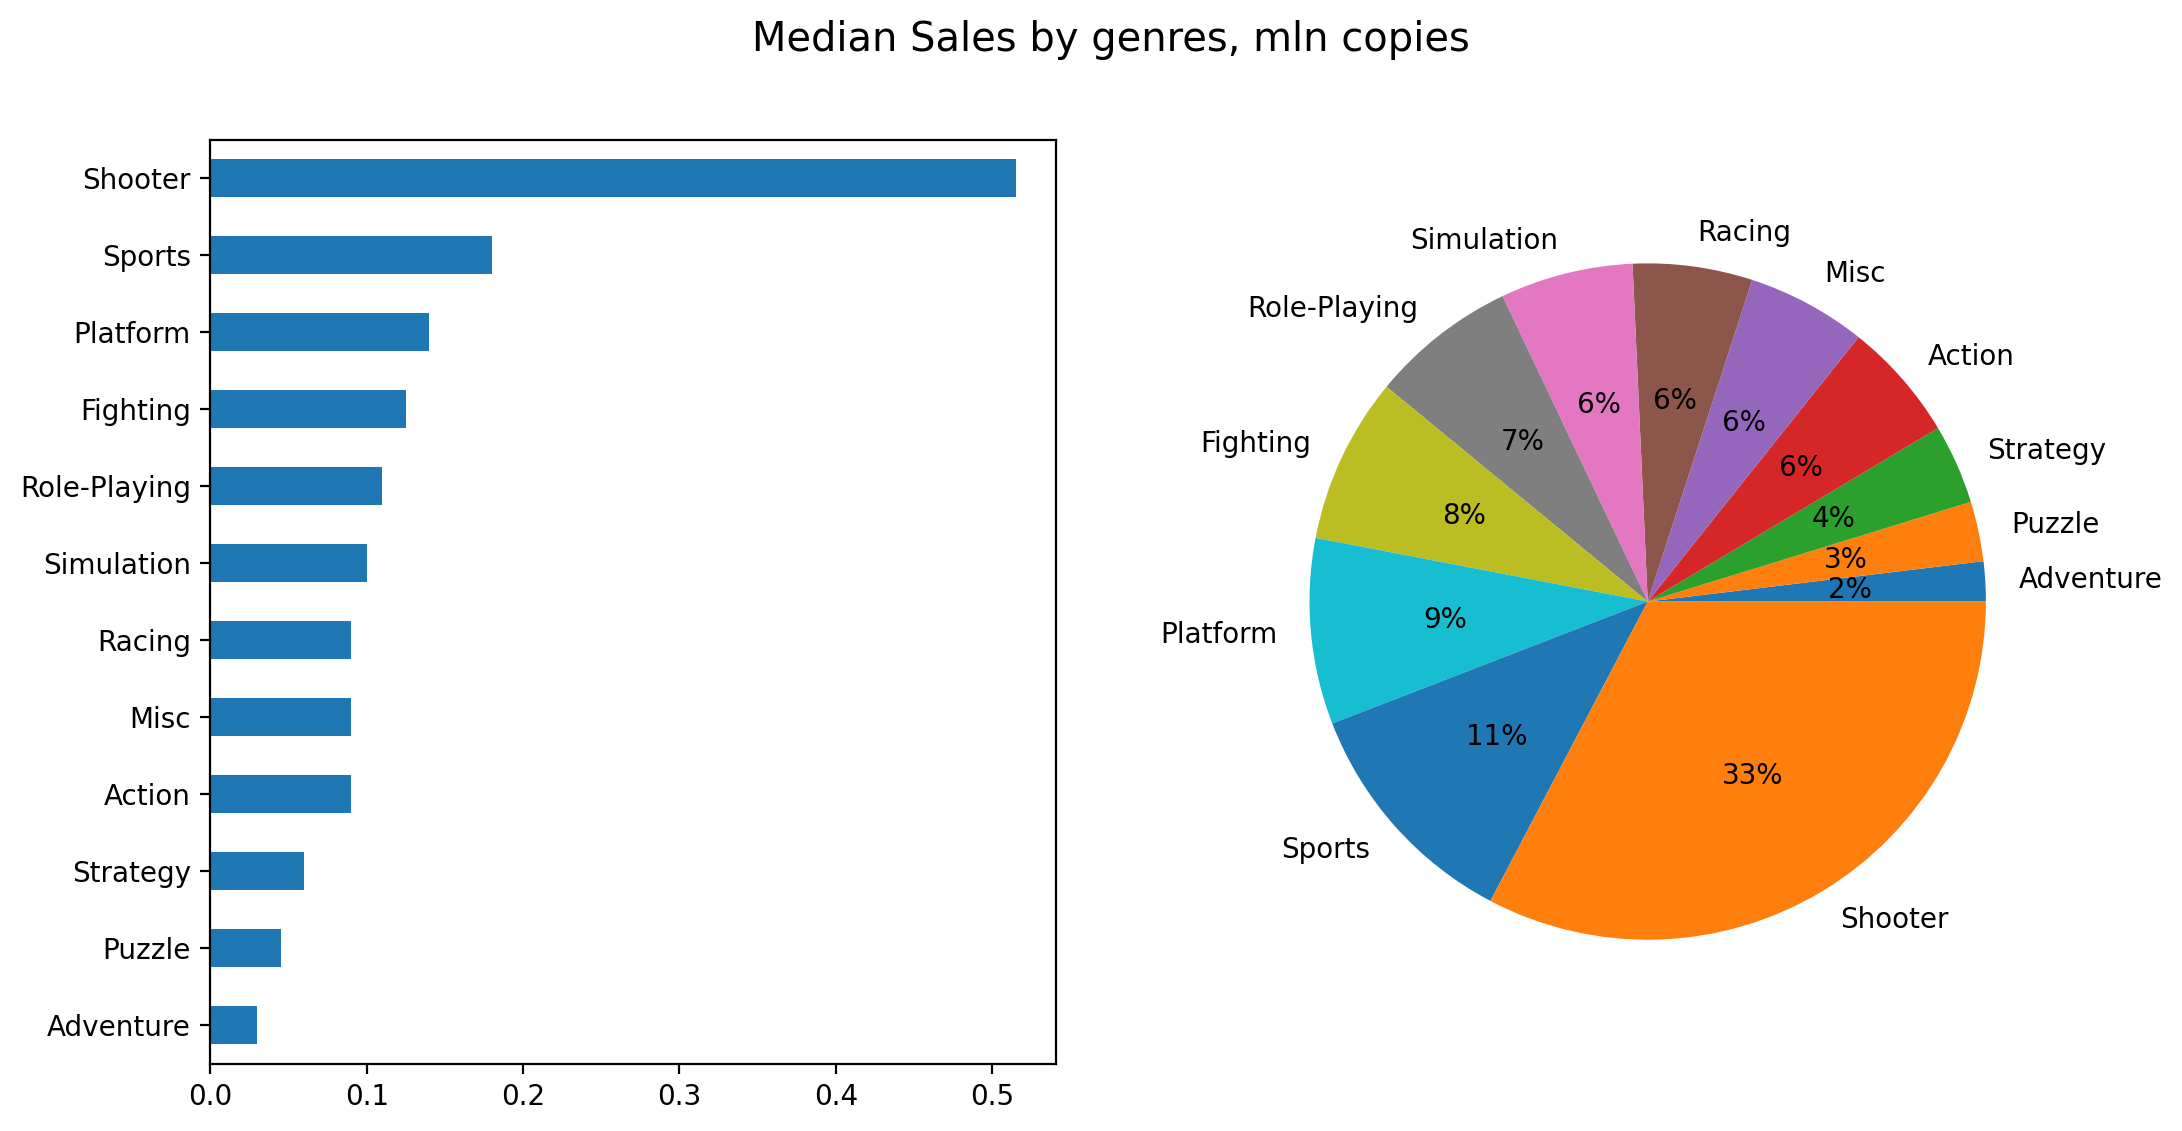
</div>


From the region planning perspective for 2017 we should consider the difference between preferances of each market:
    
1. PS and Xbox in North America and Europe have ~75% of market share, but in Japan leads 3DS

<div>
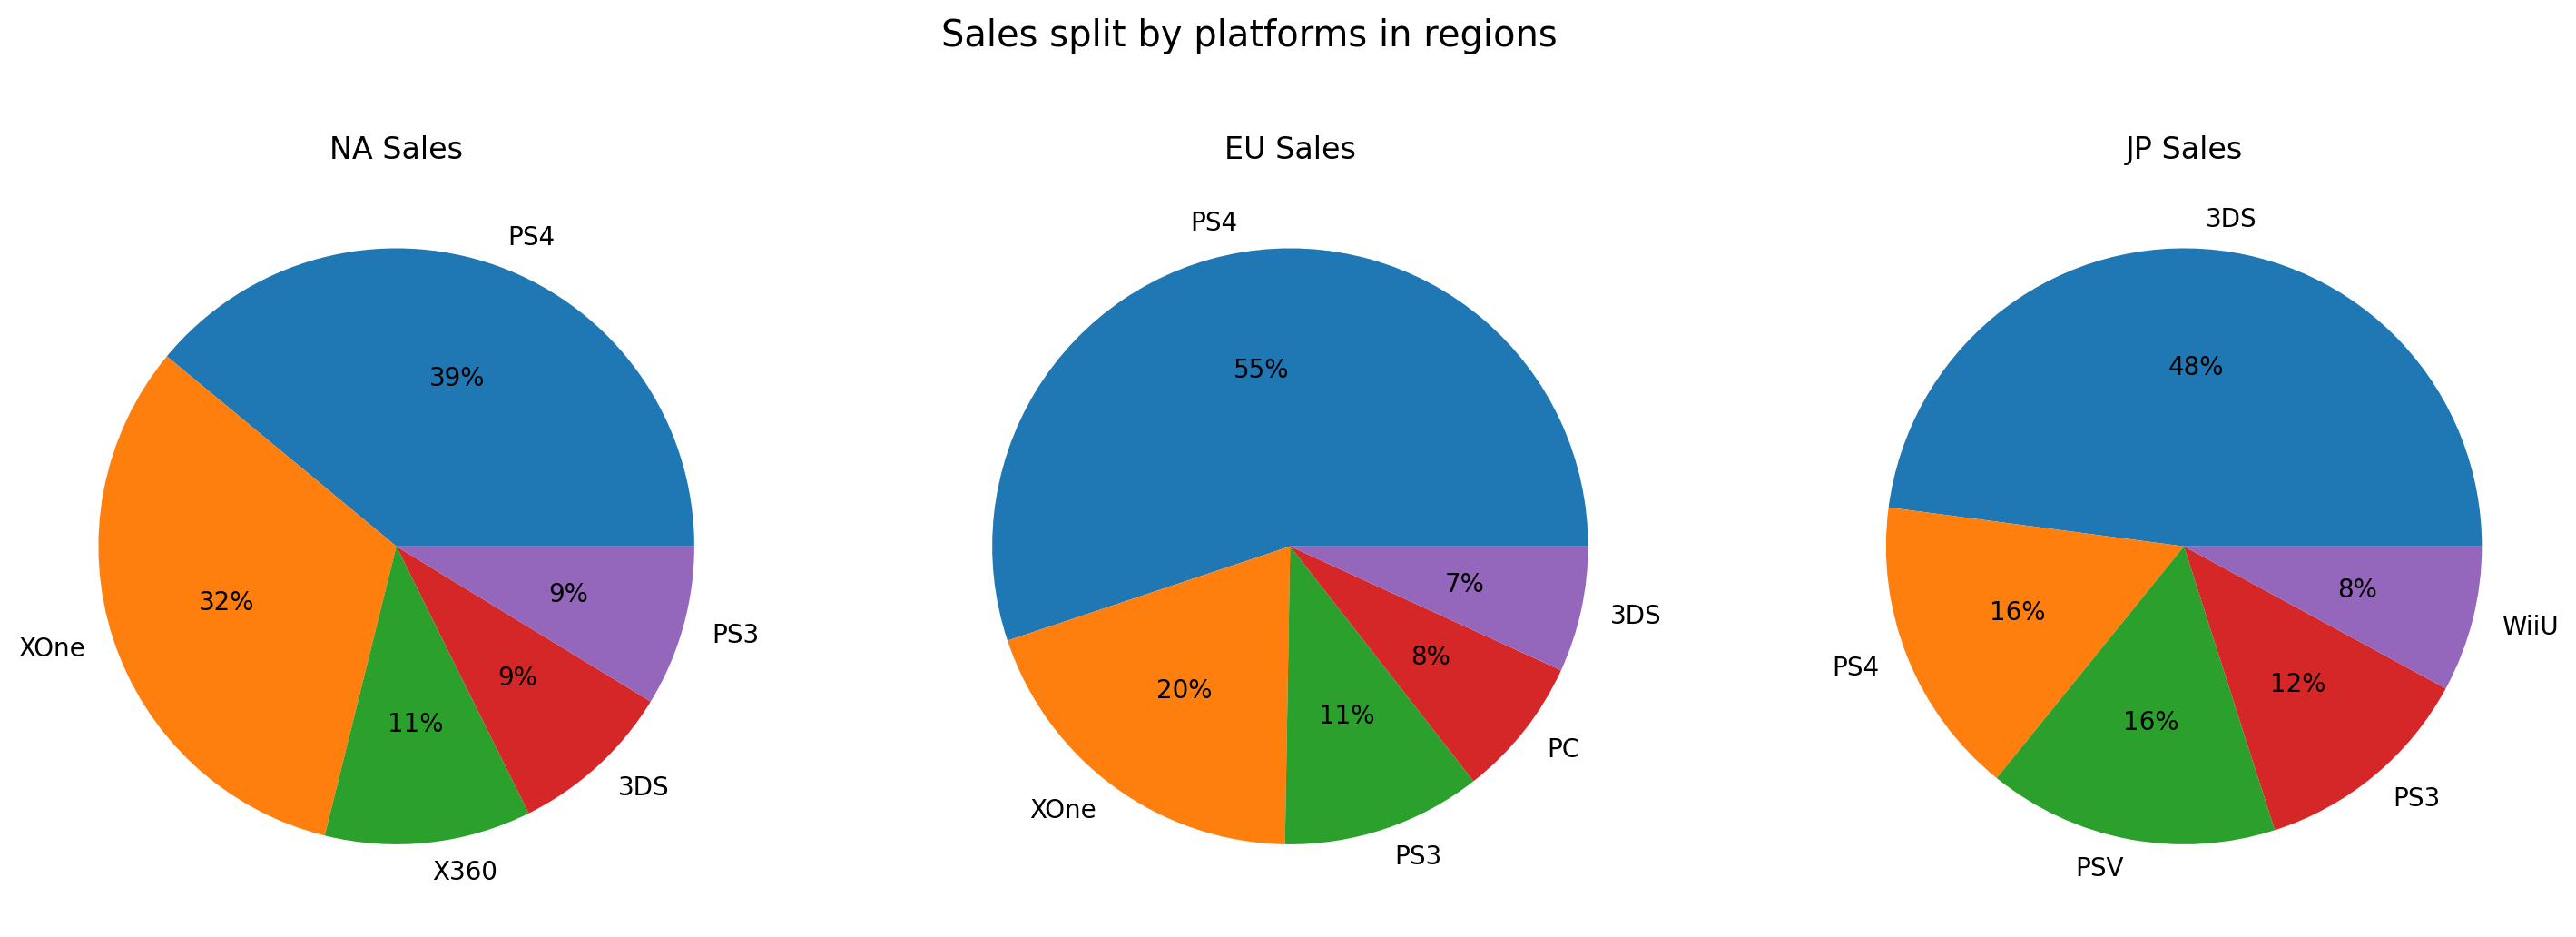
</div>

    
2. Same picture with genres: North America and Europe has two leaders - `Shooter` and `Action`, 3rd place is for `Sport`. In Japan the leader is `Role-Playing`, but `Sport` category is not even in top-5 selling genres
    
    * Top-5 selling platforms distribution

    
<div>
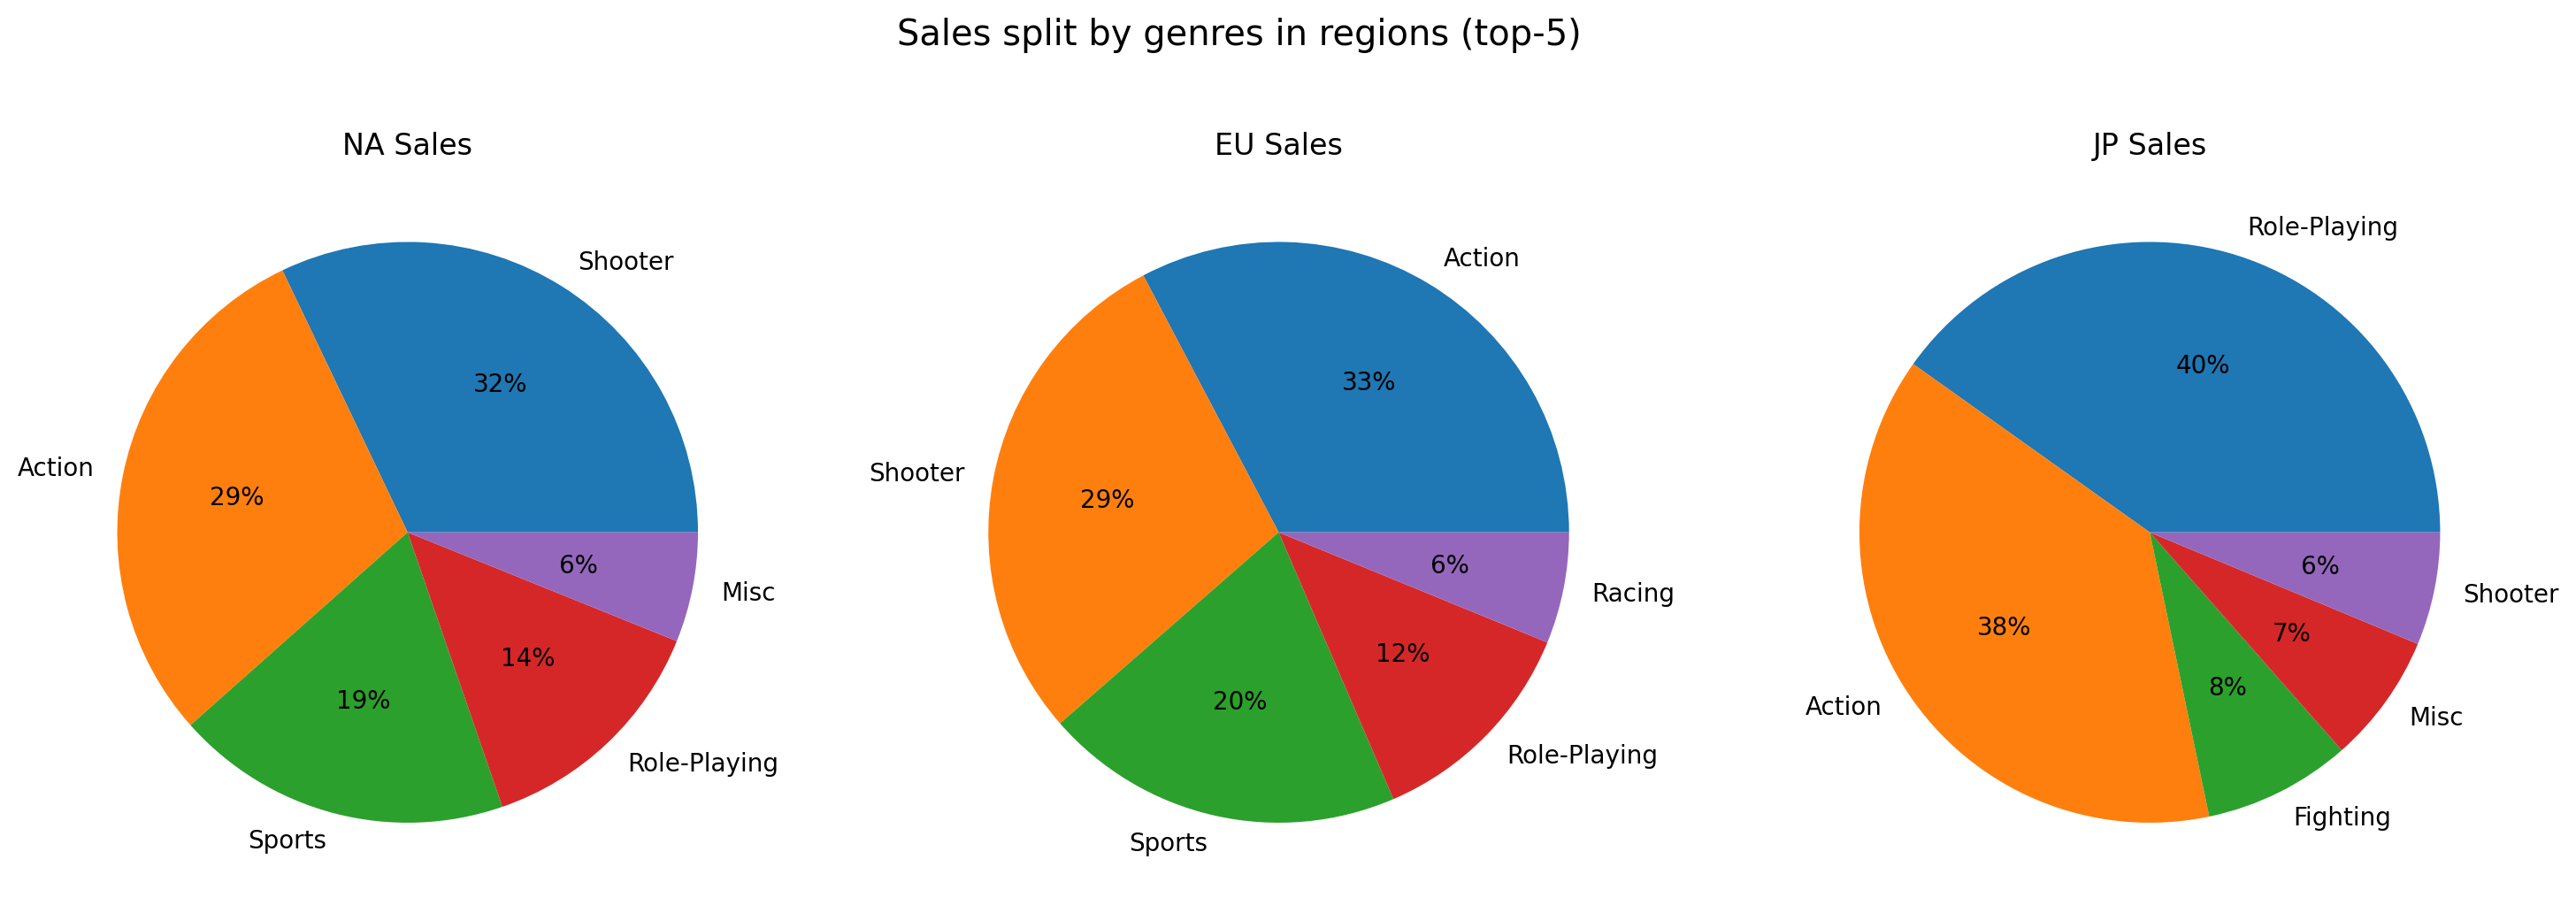
</div>

3. We should also consider Game rating (age): in America and Europe the most popular is M (Mature), In Japan is T (Teen). Though, in Japan there is a lot of data missing (61% unknown rating) - so need to tell to data collection team to check 

    * Market split by ratings:
<div>
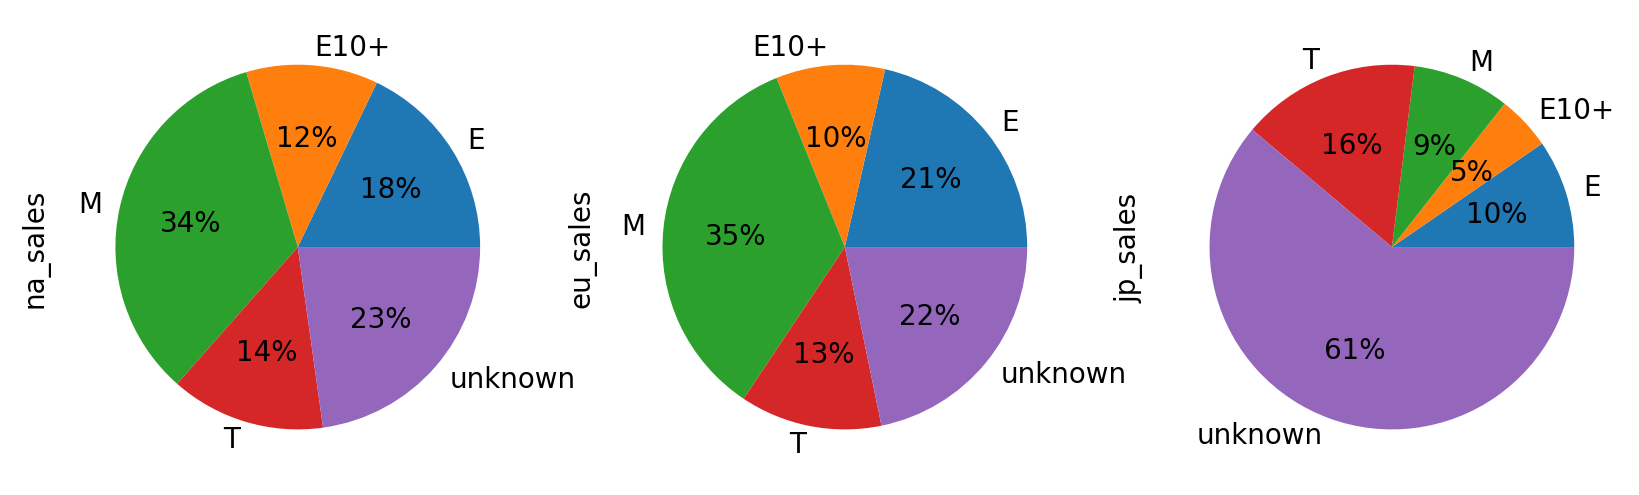
</div>

### Recommendations for marketing department

* First we should double check data completeness of 2016. If it is not full - we need to understand the trend vs 2015 and incorporate the respective sales for 2017. Anyway it should be higher than full previous year as the market is continuosly decreasing year-by-year
* Games in genres `Shooter` and `Sport` are most likely to be top-sellers
* In North America and Europe
    * Core focus platforms - `PS4` and `Xbox`
    * Games in genres `Action`, `Shooter`, `Sports` will bring the biggest sales. But should be careful with `Action` games as they have low median sales (with highest total). Should carefully check potential best-sellers and critic scores
    * Games with ratigns `M` and `E` are best selling
* In Japan:
    * Core platforms - `3DS`, `PS4`, `PSV`
    * Top-selling genres `Role-playing`, `Action`
    * Top-selling rating `Т` and `E` (Teen and Everyone)

## Hypothesis check

We checked 2 hypotheses:
- **Hypothesis 1:** Average user scores of `XOne` and `PC` platforms are equal
    - **is not declined**. Average scores are not different
- **Hypothesis 2:** Average user scores of `Action` and `Sports` genres are equal
    - **is declined**. Average scores are different

### Additional findings:
- The amount of copies sold is not directly connected to the game score (both critic and user) 
- Different platforms has its own bestsellers with mlns copies sold, but they are just run-outs on the chart. We shouldn't focus only on top-sellers, but rather on the whole market using median sales (which are 50-150k per game)

<div>
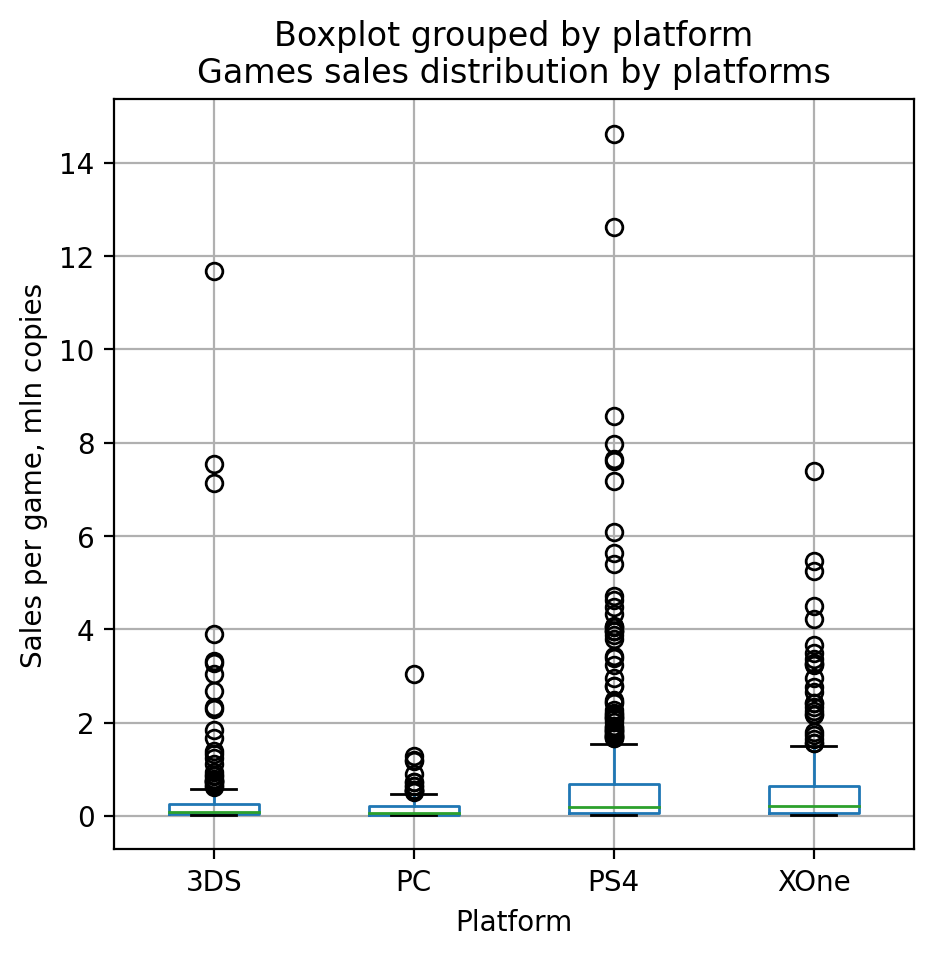
</div>

### Recommendations for data collection team
* Check data completeness for 2016
* Need to check `user_score` in database as there are a lot of `tbd` values. Maybe there is an update available
* If possible, to add critic and user score count
* Get ratings (age) for Japan (preferably, comparable to ESRB)